# Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

# Objective
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

# Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

- **case_id:** ID of each visa application
- **continent:** Information of continent the employee
- **education_of_employee:** Information of education of the employee
- **has_job_experience:** Does the employee has any job experience? Y= Yes; N = No
- **requires_job_training:** Does the employee require any job training? Y = Yes; N = No
- **no_of_employees:** Number of employees in the employer's company
- **yr_of_estab:** Year in which the employer's company was established
- **region_of_employment:** Information of foreign worker's intended region of employment in the US.
- **prevailing_wage:** Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- **unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- **full_time_position:** Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
- **case_status:** Flag indicating if the Visa was certified or denied

# Import Necessary Libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingRegressor,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.metrics import roc_curve, auc

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading and Understanding the dataset

In [ ]:
df = pd.read_csv('/content/EasyVisa.csv')

In [ ]:
df.shape

(25480, 12)

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Statistical Summary

In [ ]:
df.describe(include=(int, float, object)).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for Null Values

In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
df.isnull().any().sum()

0

In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
case_id,0.000
continent,0.000
education_of_employee,0.000
has_job_experience,0.000
requires_job_training,0.000
no_of_employees,0.000
yr_of_estab,0.000
region_of_employment,0.000
prevailing_wage,0.000
unit_of_wage,0.000


### Check for Duplicated Values

In [ ]:
df.duplicated().sum()

0

## Summary
- The dataset has **25480** rows and **12** columns.
- The dataset mainly has columns of object data type (i.e, 9) and 2 integer and a float columns.
- There are **no null** found in the dataset.
_ There are zero rows that are duplicated.
- We will delete the column `case_id` as it doesn't add significant value in prediction.
- Majority of empolyess are being **"Asian"** with the count of **16861**.
- The employees with most education being **Bachelor's** with frequency of **10234**.
- The employees with previous job experience are high in number. Therefore the number of employess in need of training is less.
- **`no_of_employees`** has the mean value of 5667.043 but with high standard deviation of 22877.929. It is found that the column might of outliers has the minimum value entered is **-26.00**. 25% of the companies have 1022 of empolyees, 50% have 2109 and 75% has 3504 employees respectively. But the maximum value that is found as the count of employees is 602069.
- Most companies are operated in **Northeast**.
- `prevailing_wage` is entered for hourly, weekly, monthly and yearly in the dataset creating discrepancy.
- Most of the empolyees are in full-time position.
- The `case_status` of most of the immigrants are certified to work in the US with the count of 17018.


# Explorartory Data Analysis (EDA)

## Univariate Analysis

In [ ]:
df.head(1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied


In [ ]:
def plot_countplot_with_percentage(data, column, title=None, figsize=(8, 6)):
    """
    Plots a countplot with percentages for a given categorical column in a dataset.

    Parameters:
        data (pd.DataFrame): The dataset containing the column.
        column (str): The name of the categorical column to plot.
        title (str, optional): The title for the plot. Defaults to None.
        figsize (tuple, optional): The size of the figure. Defaults to (8, 6).
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=column)

    # Calculate the total number of entries
    total = len(data)

    # Annotate the bars with percentages
    for p in ax.patches:
        percentage = f'{(p.get_height() / total) * 100:.2f}%'  # Calculate percentage
        x = p.get_x() + p.get_width() / 2  # X-coordinate of text
        y = p.get_height() + 0.5  # Y-coordinate of text (slightly above the bar)
        ax.text(x, y, percentage, ha='center')  # Add text

    # Add labels and title
    ax.set_ylabel("Count")
    ax.set_xlabel(column.capitalize())
    ax.set_title(title if title else f"Distribution of {column.capitalize()}")

    plt.show()

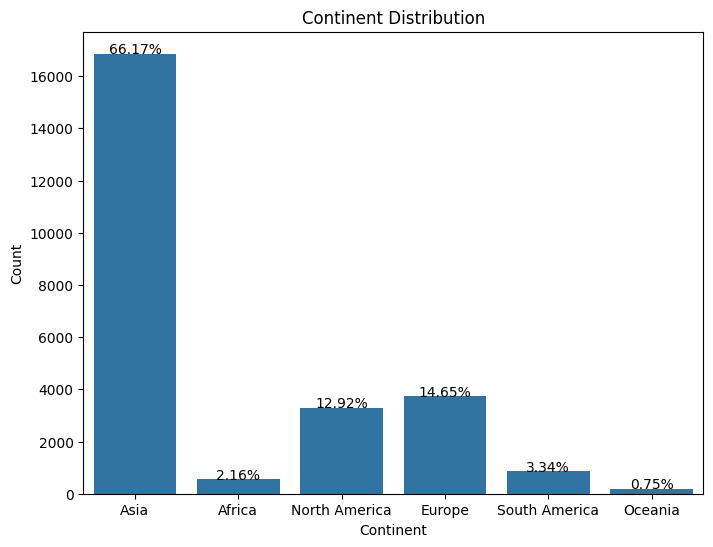

In [ ]:
plot_countplot_with_percentage(data=df, column="continent", title="Continent Distribution")

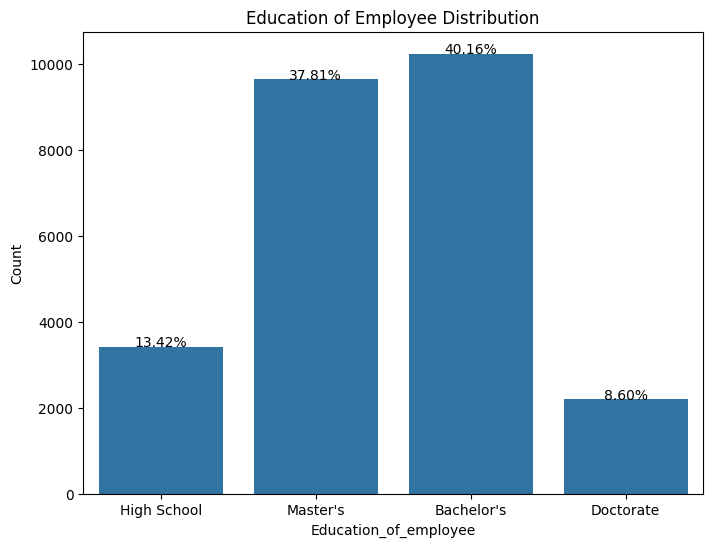

In [ ]:
plot_countplot_with_percentage(data=df, column="education_of_employee", title="Education of Employee Distribution")

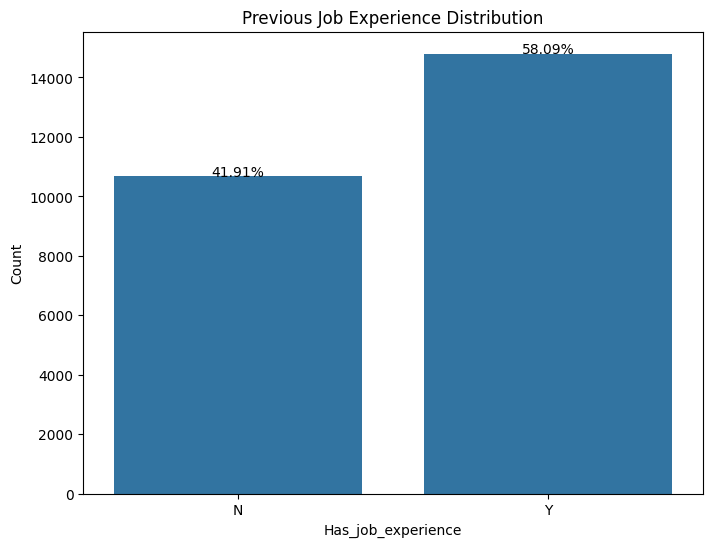

In [ ]:
plot_countplot_with_percentage(data=df, column="has_job_experience", title="Previous Job Experience Distribution")

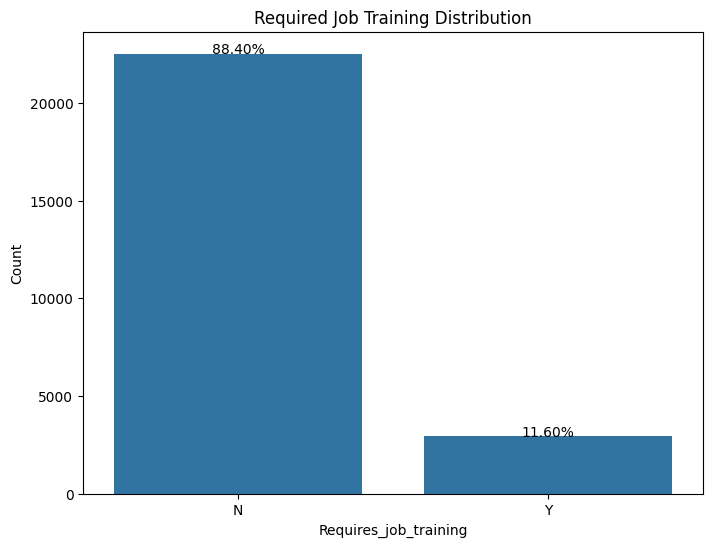

In [ ]:
plot_countplot_with_percentage(data=df, column="requires_job_training", title="Required Job Training Distribution")

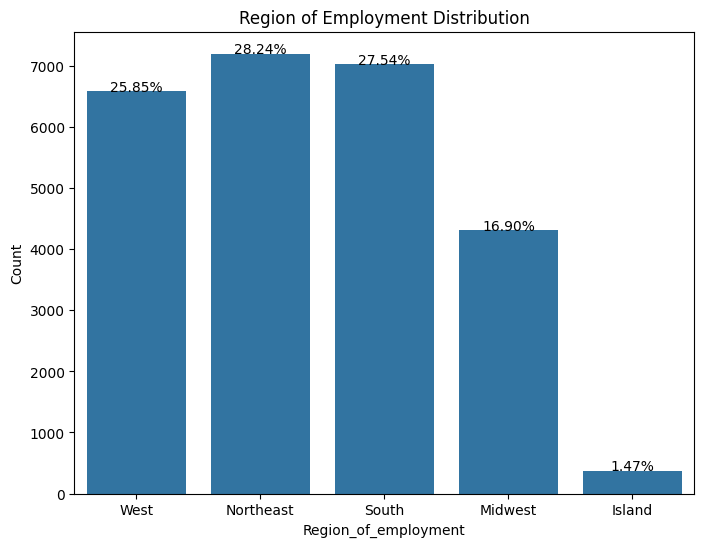

In [ ]:
plot_countplot_with_percentage(data=df, column="region_of_employment", title="Region of Employment Distribution")

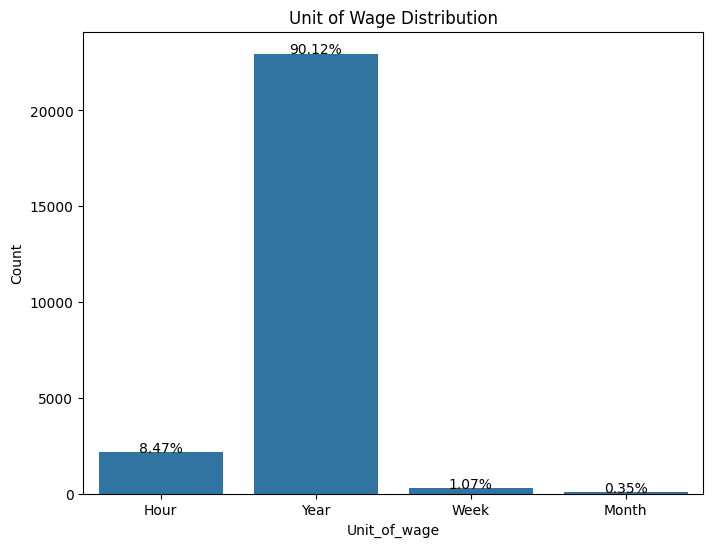

In [ ]:
plot_countplot_with_percentage(data=df, column="unit_of_wage", title="Unit of Wage Distribution")

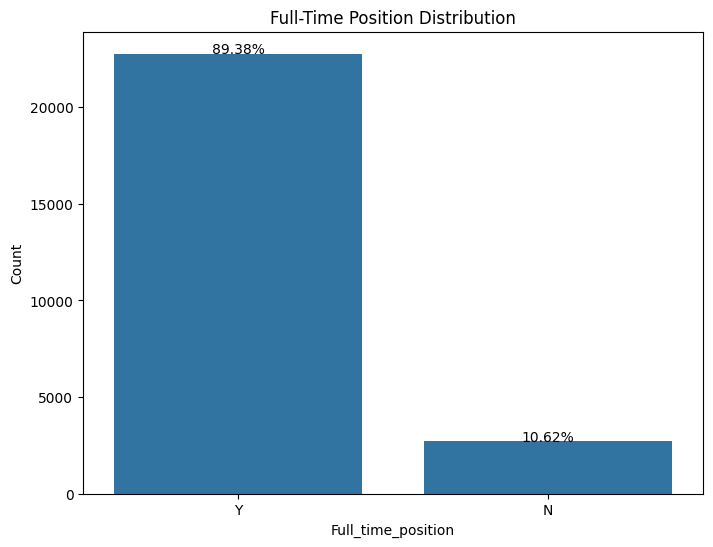

In [ ]:
plot_countplot_with_percentage(data=df, column="full_time_position", title="Full-Time Position Distribution")

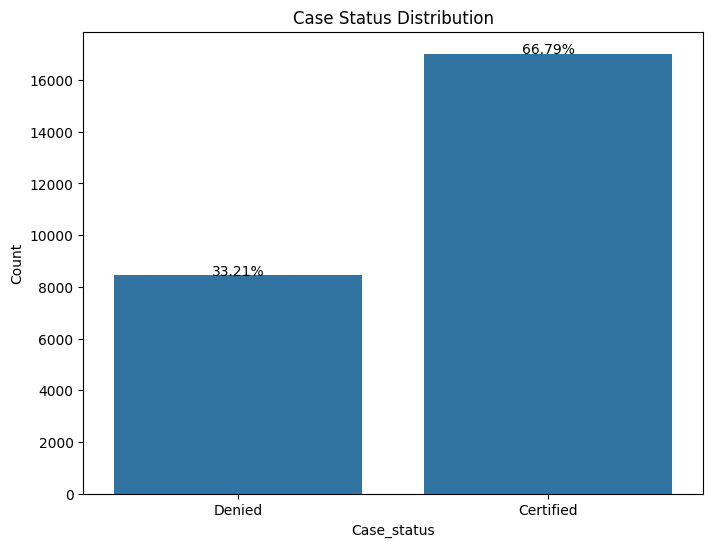

In [ ]:
plot_countplot_with_percentage(data=df, column="case_status", title="Case Status Distribution")

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Create the figure and subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Adjust subplot size ratios
        figsize=figsize,
    )

    # Create the boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # Create the histogram
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Add mean and median lines to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist2.legend()  # Add legend to show mean and median lines

    # Set the overall title for the figure
    f2.suptitle(f"Distribution of {feature.capitalize()}", fontsize=16)

    # Display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for title
    plt.show()


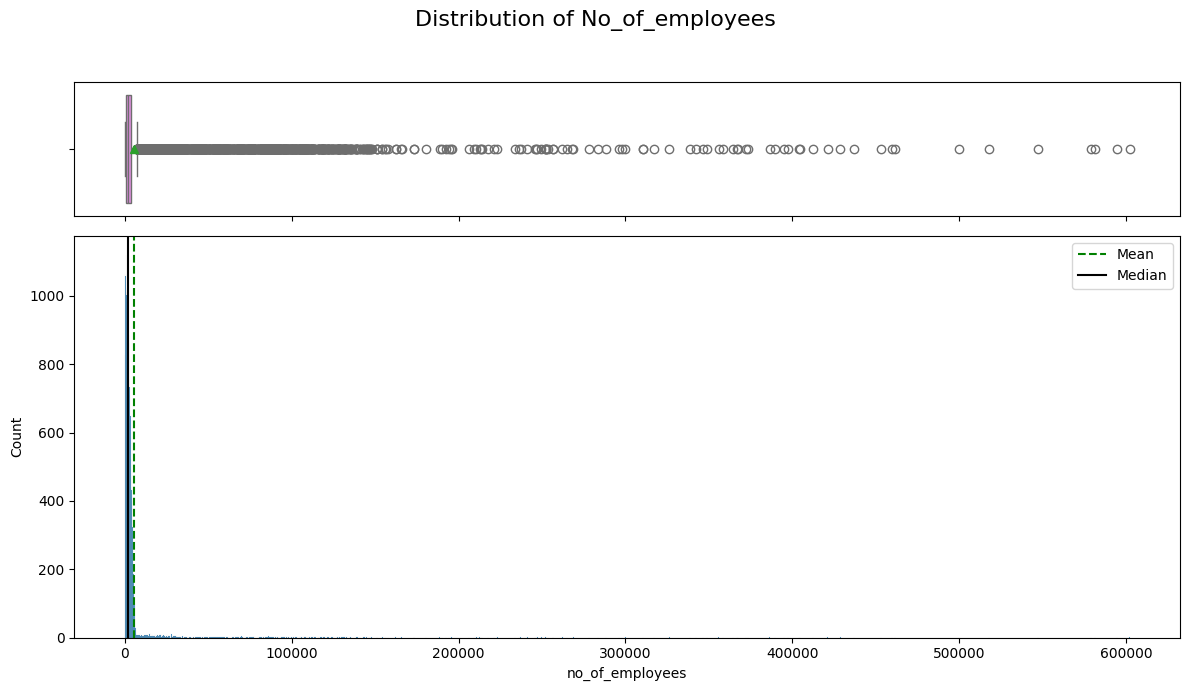

In [ ]:
histogram_boxplot(df, 'no_of_employees')

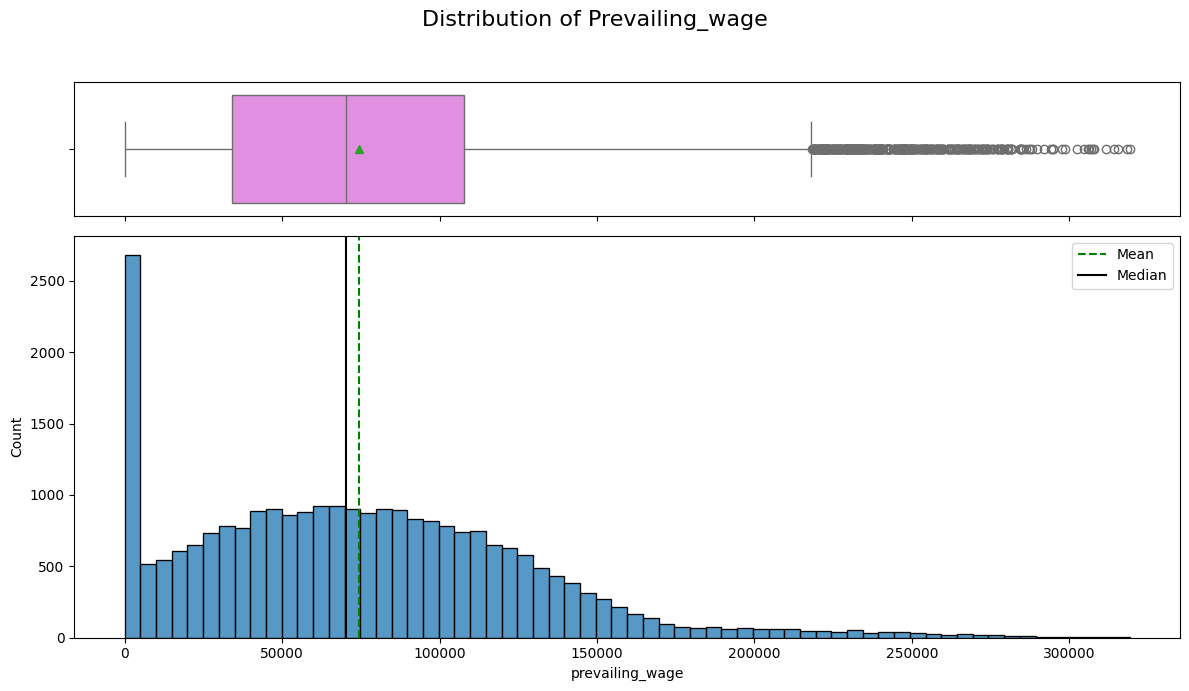

In [ ]:
histogram_boxplot(df, 'prevailing_wage')

## Bivariate Analysis

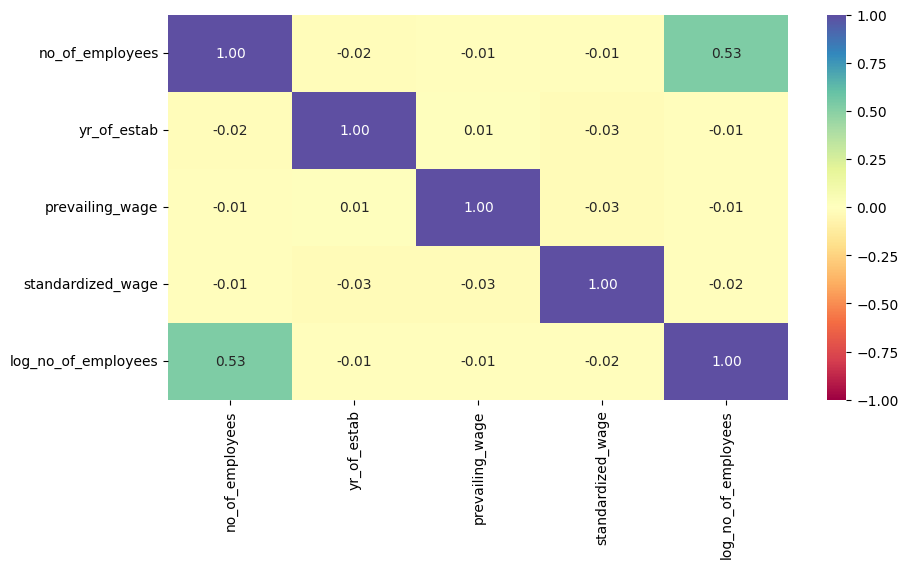

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

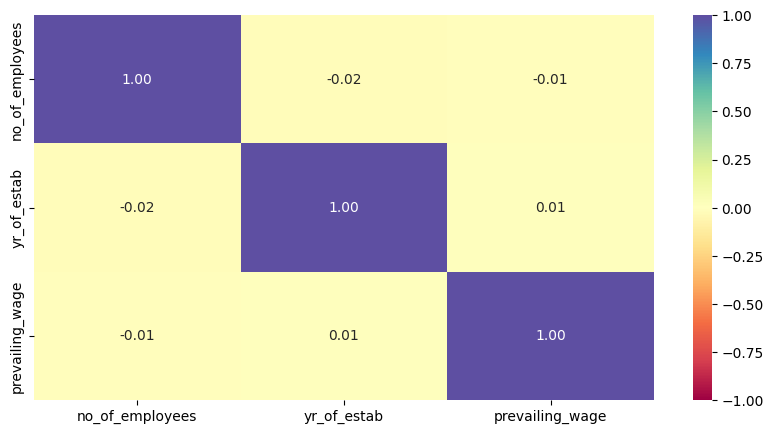

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- By observing the obtained heat map we can say that there is alomst no correlation between any of the numerical variable.
- However, we need to drop the column **`['no_of_empolyee']`** to avoid multicollinearity with **`'log_no_of_employee'`**.

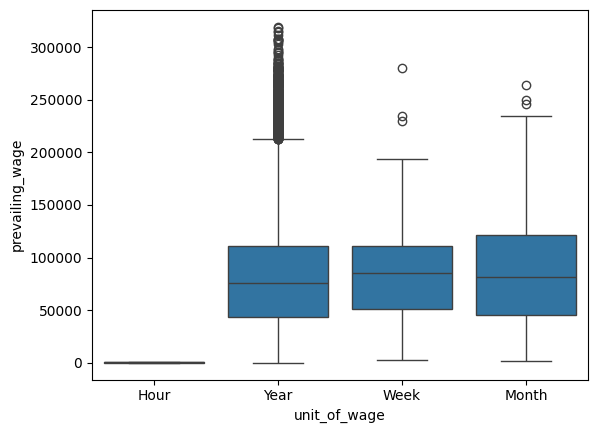

In [ ]:
sns.boxplot(data=df, x='unit_of_wage', y='prevailing_wage');

<Axes: xlabel='region_of_employment', ylabel='no_of_employees'>

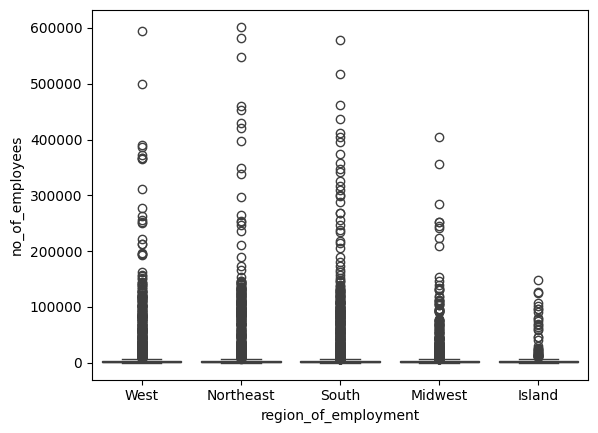

In [ ]:
sns.boxplot(data=df, x='region_of_employment', y='no_of_employees')

<Axes: xlabel='full_time_position', ylabel='count'>

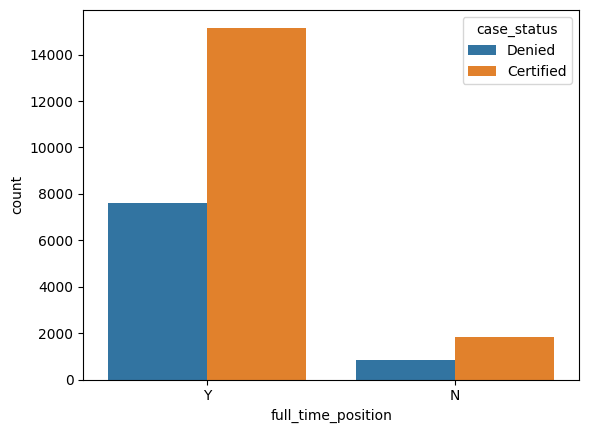

In [ ]:
sns.countplot(data = df, x = 'full_time_position', hue = 'case_status')

<Axes: xlabel='region_of_employment', ylabel='count'>

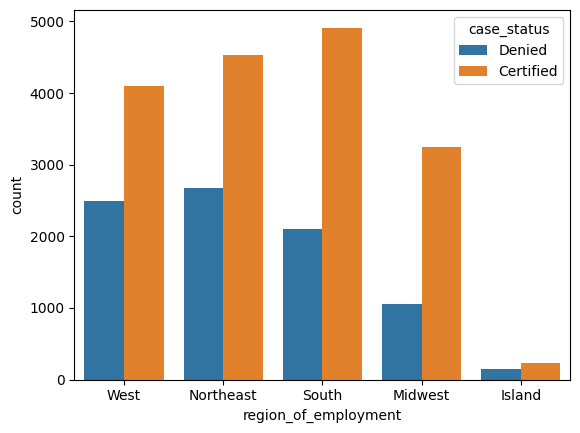

In [ ]:
sns.countplot(data = df, x = 'region_of_employment', hue = 'case_status')

<Axes: xlabel='continent', ylabel='count'>

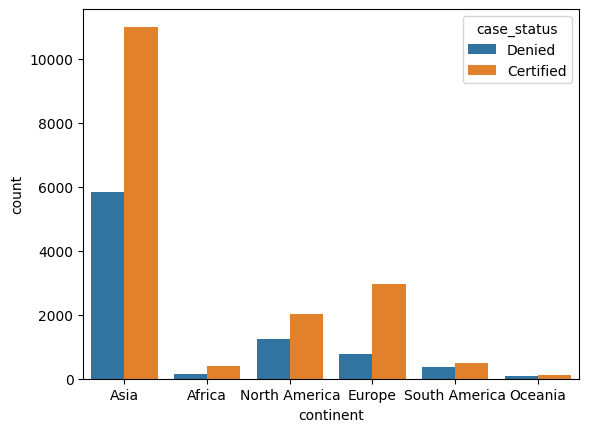

In [ ]:
sns.countplot(data = df, x = 'continent', hue = 'case_status')

<Axes: xlabel='continent', ylabel='count'>

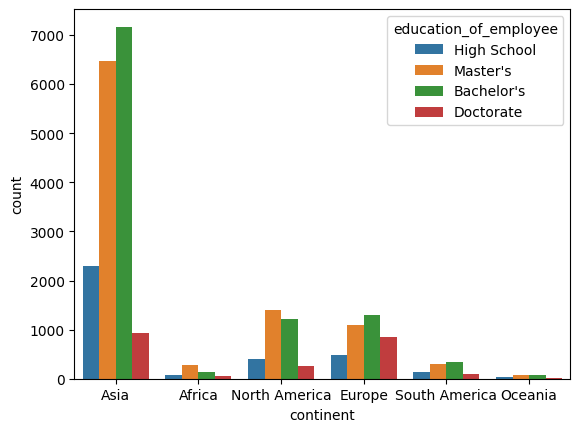

In [ ]:
sns.countplot(data = df, x = 'continent', hue = 'education_of_employee')

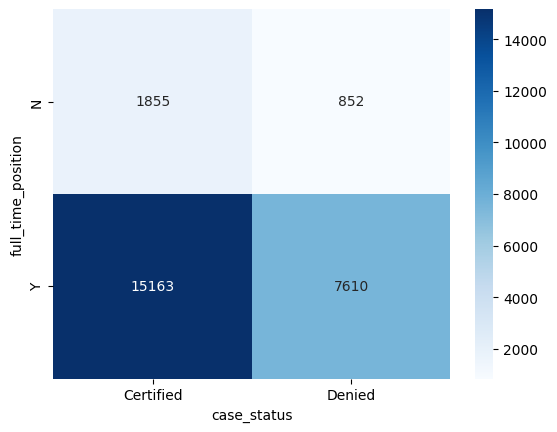

In [ ]:
crosstab = pd.crosstab(df['full_time_position'], df['case_status'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.show()


**We notice that most of visa's are certified for the empolyees with full time posistion.**

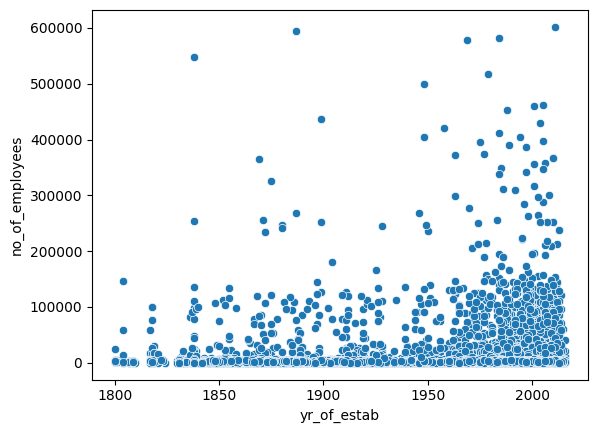

In [ ]:
sns.scatterplot(data=df, x='yr_of_estab', y='no_of_employees')
plt.show()

### Summary:

### **1. Correlation Heatmaps**
- **First Heatmap (Expanded variables)**:
  - The correlation between `log_no_of_employees` and `no_of_employees` is significant (0.53), as expected due to their relationship.
  - The correlations between `no_of_employees`, `yr_of_estab`, `prevailing_wage`, and `standardized_wage` are very weak, suggesting minimal linear dependence among these variables.
  - Variables like `yr_of_estab` and `prevailing_wage` are independent and show near-zero correlation with each other or other features.

- **Second Heatmap (Subset of variables)**:
  - Similar insights can be derived as this subset emphasizes that there is no strong correlation among `no_of_employees`, `yr_of_estab`, and `prevailing_wage`.

#### Key Takeaway:
These heatmaps indicate that the numerical variables are largely independent of one another, except for the derived `log_no_of_employees`. This suggests further exploration of non-linear relationships or interactions between categorical and numerical variables.

-----

### **2. Heatmap for Full-Time Positions and Case Status**
- The majority of certified cases are full-time positions (15,163), whereas a significant portion of denied cases (7,610) also come from full-time positions.
- For part-time positions:
  - Certified cases are relatively lower (1,855).
  - Denied cases are significantly fewer (852), indicating that part-time jobs might have a lower volume overall or a slightly higher certification rate.

#### Key Takeaway:
Full-time positions are predominant among both certified and denied cases, suggesting that job status (full-time/part-time) alone might not be a strong determinant for case certification. Further analysis could explore how other variables (e.g., prevailing wage, region, or experience) interact with case status.


## Data preprocessing

In [ ]:
data = df.copy()

#### Outlier Detection and Treatment

In [ ]:
data['unit_of_wage'].value_counts()

,count
unit_of_wage,
Year,22962
Hour,2157
Week,272
Month,89


In [ ]:
# Conversion factors to yearly wage
conversion_factors = {
    'Hour': 40 * 52,  # 40 hours per week, 52 weeks per year
    'Week': 52,       # 52 weeks per year
    'Month': 12,      # 12 months per year
    'Year': 1         # Already in yearly terms
}

# Standardize prevailing_wage to yearly values
data['standardized_wage'] = data.apply(
    lambda row: row['prevailing_wage'] * conversion_factors[row['unit_of_wage']],
    axis=1
)

# Check the updated column
print(data[['prevailing_wage', 'unit_of_wage', 'standardized_wage']].head())


   prevailing_wage unit_of_wage  standardized_wage
0          592.203         Hour        1231782.032
1        83425.650         Year          83425.650
2       122996.860         Year         122996.860
3        83434.030         Year          83434.030
4       149907.390         Year         149907.390


In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,standardized_wage
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied,1231782.032
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified,83425.650
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied,122996.860
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied,83434.030
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified,149907.390


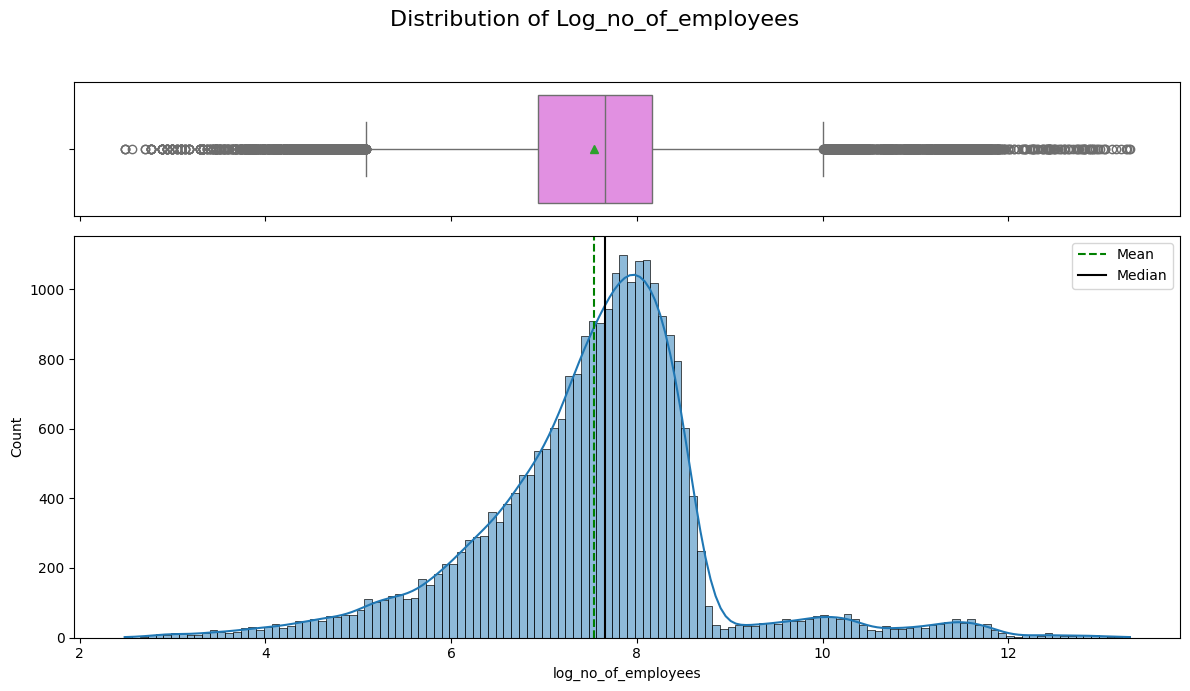

In [ ]:
# Apply log transformation
data['log_no_of_employees'] = np.log(data['no_of_employees'])  # log1p handles log(0) safely

# Plot again to visualize
histogram_boxplot(data=data, feature='log_no_of_employees', kde=True)

In [ ]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.shape

(25480, 14)

In [ ]:
data.head(1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,standardized_wage,log_no_of_employees
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied,1231782.032,9.583


#### Feature Engineering

In [ ]:
data['case_status_encoded'], uniques = pd.factorize(data['case_status'])
print("Unique Mapping:", dict(enumerate(uniques)))

Unique Mapping: {0: 'Denied', 1: 'Certified'}


In [ ]:
data.head(1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,standardized_wage,log_no_of_employees,case_status_encoded
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied,1231782.032,9.583,0


### Spliting of the data

**`data_copy_original`** - This dataset contains the all the columns as in original dataset.



In [ ]:
column_names = data.columns
print(column_names)

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'standardized_wage',
       'log_no_of_employees', 'case_status_encoded'],
      dtype='object')


In [ ]:
data_copy_original = data.copy()

In [ ]:
data_copy_original.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'standardized_wage',
       'log_no_of_employees', 'case_status_encoded'],
      dtype='object')

In [ ]:
# Separating features and the target column
data_copy_original_X = data_copy_original.drop(["case_id",'no_of_employees','case_status','case_status_encoded','standardized_wage'], axis=1)
data_copy_original_y = data_copy_original["case_status_encoded"]

In [ ]:
data_copy_original_X.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'yr_of_estab', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position',
       'log_no_of_employees'],
      dtype='object')

In [ ]:
data_copy_original_y.head(1)

,case_status_encoded
0,0


In [ ]:
data_copy_original_X = pd.get_dummies(
    data_copy_original_X,
    columns=data_copy_original_X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

data_copy_original_X = data_copy_original_X.astype(float)

In [ ]:
data_copy_original_X.head()

,yr_of_estab,prevailing_wage,log_no_of_employees,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,2007.000,592.203,9.583,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
1,2002.000,83425.650,7.788,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
2,2008.000,122996.860,10.702,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
3,1897.000,83434.030,4.585,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
4,2005.000,149907.390,6.987,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000


In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
data_copy_original_X_train, data_copy_original_X_temp, data_copy_original_y_train, data_copy_original_y_temp = train_test_split(
    data_copy_original_X,data_copy_original_y, test_size=0.5, random_state=0, stratify=data_copy_original_y
)

# then we split the temporary set into train and validation
data_copy_original_X_val, data_copy_original_X_test, data_copy_original_y_val, data_copy_original_y_test = train_test_split(
    data_copy_original_X_temp, data_copy_original_y_temp, test_size=0.4, random_state=0, stratify=data_copy_original_y_temp
)

print("X train, val, test: ", data_copy_original_X_train.shape, data_copy_original_X_val.shape, data_copy_original_X_test.shape)
print("X train, val, test: ", data_copy_original_y_train.shape, data_copy_original_y_val.shape, data_copy_original_y_test.shape)

X train, val, test:  (12723, 21) (7634, 21) (5090, 21)
X train, val, test:  (12723,) (7634,) (5090,)


**Dataframes are carefully splitted among train, validation and test without any data leakage.**

# Model Building - Original Data

## **Model Evaluation Criterion**  
**What does EasyVisa want?**  

EasyVisa aims to build a system that minimizes the risk of incorrectly predicting visa approvals. Two potential risks must be considered:  
1. **Risk of approving a visa for an unqualified applicant**:  
   - This could lead to misuse of immigration systems or even potential non-compliance with government regulations.  
2. **Risk of denying a visa to a qualified applicant**:  
   - This results in missed opportunities for talented workers and can create dissatisfaction among employers.

---


**Which risk is greater?**  
Approving a visa for an unqualified applicant poses a more significant risk since it could lead to legal issues and impact the integrity of the visa approval process.


---

### **Metric Selection**  

**Key Metric**: **Precision**  
- Since approving unqualified applicants (False Positives) is more critical to avoid, Precision is the most appropriate metric here.  

**Why Precision?**  
- Precision gives the ratio of **True Positives** (correctly certified visas) to **Predicted Positives** (all certified visas).  
- A high Precision implies that when a visa is approved, it is highly likely to be a valid approval, thus minimizing False Positives.  

---

**Secondary Metric**: **Recall**  
- Although Precision is the primary focus, we should also monitor Recall to ensure the system is not rejecting too many genuinely qualified applicants (minimizing False Negatives).  
- A balance between Precision and Recall can be monitored using the **F1-Score**.

By prioritizing Precision, EasyVisa can ensure compliance and accuracy while recommending visa approvals, maintaining the trust and integrity of the immigration process.

## For Dataset: `data_copy_original`

### Decision Tree

In [ ]:
dt_model_2 = DecisionTreeClassifier(random_state=42)
dt_model_2.fit(data_copy_original_X_train, data_copy_original_y_train)
dt_preds = dt_model_2.predict(data_copy_original_X_val)

In [ ]:
accuracy = accuracy_score(data_copy_original_y_val, dt_preds)
precision = precision_score(data_copy_original_y_val, dt_preds)
recall = recall_score(data_copy_original_y_val, dt_preds)
f1 = f1_score(data_copy_original_y_val, dt_preds)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.66
Precision: 0.75
Recall: 0.73
F1-Score: 0.74


In [ ]:
scores = cross_val_score(dt_model_2, data_copy_original_X_train, data_copy_original_y_train, cv=5, scoring='f1')
print("Cross-validated F1 Score for Decision Tree:", scores.mean())

Cross-validated F1 Score for Decision Tree: 0.7452480998477629


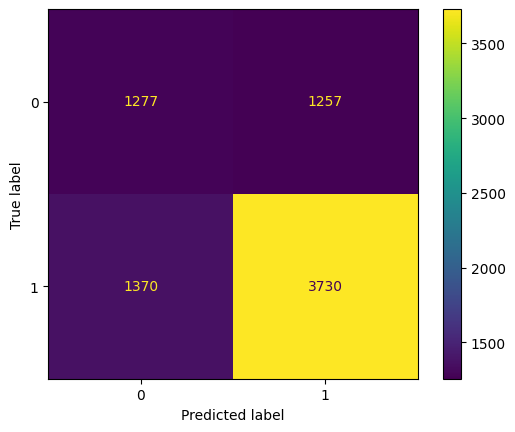

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_model_2, data_copy_original_X_val, data_copy_original_y_val)
plt.show()

### RandomForest

In [ ]:
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(data_copy_original_X_train, data_copy_original_y_train)
rf_preds = rf_model_2.predict(data_copy_original_X_val)

In [ ]:
accuracy = accuracy_score(data_copy_original_y_val, rf_preds)
precision = precision_score(data_copy_original_y_val, rf_preds)
recall = recall_score(data_copy_original_y_val, rf_preds)
f1 = f1_score(data_copy_original_y_val, rf_preds)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.72
Precision: 0.76
Recall: 0.83
F1-Score: 0.80


In [ ]:
scores = cross_val_score(rf_model_2, data_copy_original_X_train, data_copy_original_y_train, cv=5, scoring='f1')
print("Cross-validated F1 Score for Decision Tree:", scores.mean())

Cross-validated F1 Score for Decision Tree: 0.80770155794241


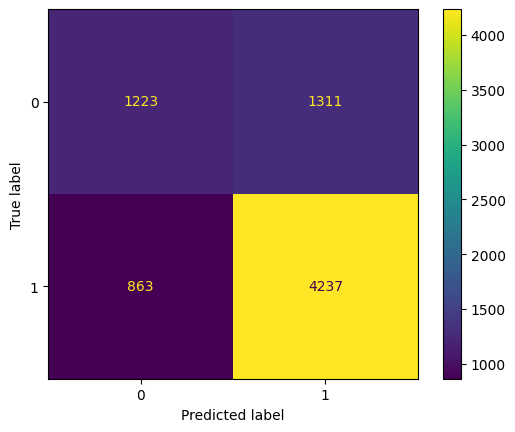

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model_2, data_copy_original_X_val, data_copy_original_y_val)
plt.show()

### Bagging Classifier

In [ ]:
bag_model_2 = BaggingClassifier(random_state=42)
bag_model_2.fit(data_copy_original_X_train, data_copy_original_y_train)
bag_preds = bag_model_2.predict(data_copy_original_X_val)

In [ ]:
accuracy = accuracy_score(data_copy_original_y_val, bag_preds)
precision = precision_score(data_copy_original_y_val, bag_preds)
recall = recall_score(data_copy_original_y_val, bag_preds)
f1 = f1_score(data_copy_original_y_val, bag_preds)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.70
Precision: 0.77
Recall: 0.77
F1-Score: 0.77


In [ ]:
scores = cross_val_score(bag_model_2, data_copy_original_X_train, data_copy_original_y_train, cv=5, scoring='f1')
print("Cross-validated F1 Score for Decision Tree:", scores.mean())

Cross-validated F1 Score for Decision Tree: 0.7775377025518019


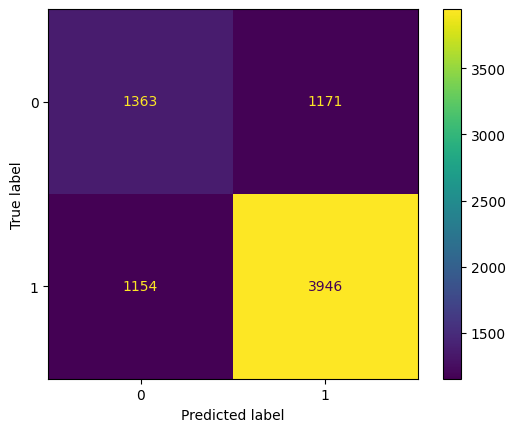

In [ ]:
ConfusionMatrixDisplay.from_estimator(bag_model_2, data_copy_original_X_val,data_copy_original_y_val)
plt.show()

### AdaBoost

In [ ]:
# AdaBoost
ada_model_2 = AdaBoostClassifier(random_state=42)
ada_model_2.fit(data_copy_original_X_train, data_copy_original_y_train)
ada_preds = ada_model_2.predict(data_copy_original_X_val)

# Evaluate the predictions
print(classification_report(data_copy_original_y_val, ada_preds))
print("Accuracy:", accuracy_score(data_copy_original_y_val, ada_preds))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53      2534
           1       0.76      0.88      0.82      5100

    accuracy                           0.74      7634
   macro avg       0.70      0.66      0.67      7634
weighted avg       0.72      0.74      0.72      7634

Accuracy: 0.7352632957820278


In [ ]:
scores = cross_val_score(ada_model_2, data_copy_original_X_train,data_copy_original_y_train, cv=5, scoring='f1')
print("Cross-validated F1 Score for Decision Tree:", scores.mean())

Cross-validated F1 Score for Decision Tree: 0.8202397350855657


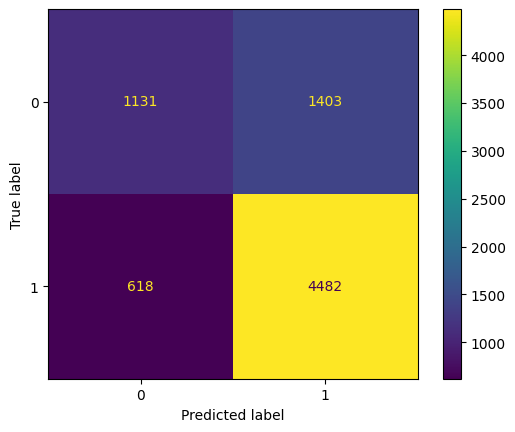

In [ ]:
ConfusionMatrixDisplay.from_estimator(ada_model_2, data_copy_original_X_val, data_copy_original_y_val)
plt.show()

### Gradient Boost

In [ ]:
# AdaBoost
gb_model_2 = GradientBoostingClassifier(random_state=42)
gb_model_2.fit(data_copy_original_X_train, data_copy_original_y_train)
gb_preds = gb_model_2.predict(data_copy_original_X_val)

# Evaluate the predictions
print(classification_report(data_copy_original_y_val, gb_preds))
print("Accuracy:", accuracy_score(data_copy_original_y_val, gb_preds))

              precision    recall  f1-score   support

           0       0.65      0.49      0.56      2534
           1       0.77      0.87      0.82      5100

    accuracy                           0.74      7634
   macro avg       0.71      0.68      0.69      7634
weighted avg       0.73      0.74      0.73      7634

Accuracy: 0.744432800628766


In [ ]:
scores = cross_val_score(gb_model_2, data_copy_original_X_train, data_copy_original_y_train, cv=5, scoring='f1')
print("Cross-validated F1 Score for Decision Tree:", scores.mean())

Cross-validated F1 Score for Decision Tree: 0.8245034887795606


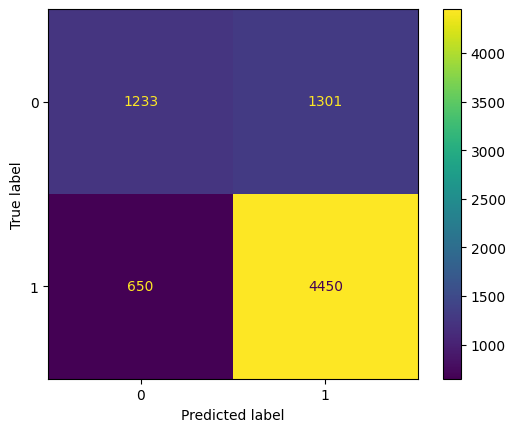

In [ ]:
ConfusionMatrixDisplay.from_estimator(gb_model_2, data_copy_original_X_val, data_copy_original_y_val)
plt.show()

### XG Boost

In [ ]:
xgb_model_2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_2.fit(data_copy_original_X_train, data_copy_original_y_train)
xgb_preds = xgb_model_2.predict(data_copy_original_X_val)

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(data_copy_original_y_val, xgb_preds))

# Accuracy
accuracy = accuracy_score(data_copy_original_y_val, xgb_preds)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(data_copy_original_y_val, xgb_preds)
print("Confusion Matrix:\n", conf_matrix)

# If the problem has binary classification, calculate ROC-AUC score
if len(data_copy_original_y_train.unique()) == 2:  # Binary classification check
    xgb_probs = xgb_model_2.predict_proba(data_copy_original_X_val)[:, 1]
    roc_auc = roc_auc_score(data_copy_original_y_val, xgb_probs)
    print("ROC-AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      2534
           1       0.77      0.85      0.80      5100

    accuracy                           0.73      7634
   macro avg       0.69      0.66      0.67      7634
weighted avg       0.71      0.73      0.72      7634

Accuracy: 0.7257008121561436
Confusion Matrix:
 [[1225 1309]
 [ 785 4315]]
ROC-AUC Score: 0.751954632681802


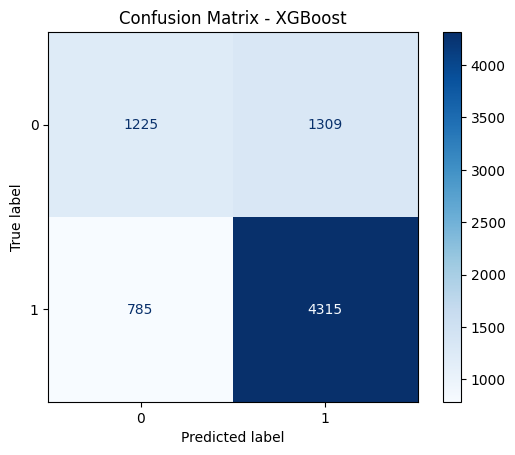

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(data_copy_original_y_val, xgb_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb_model_2.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()

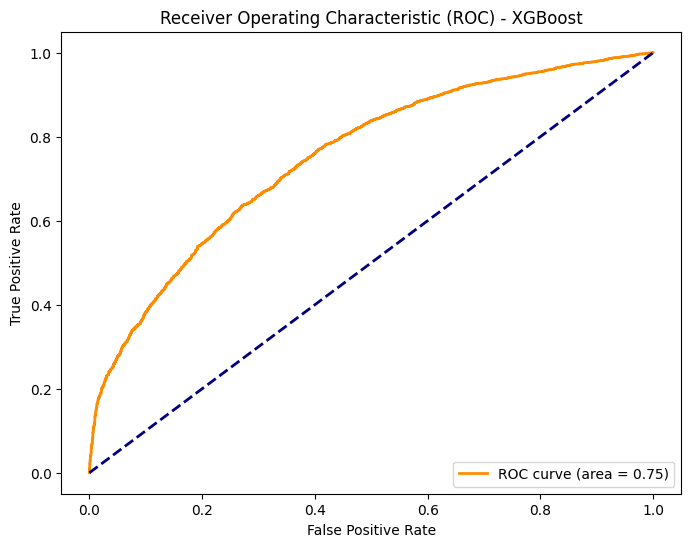

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(data_copy_original_y_val, xgb_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - XGBoost")
plt.legend(loc="lower right")
plt.show()

## Evaluating and choosing the best performance model

In [ ]:
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="binary")
    return {"Precision": precision, "Recall": recall, "Accuracy": accuracy, "F1 Score": f1}

In [ ]:
# Example for 5 models
models_metrics = {}

# Evaluate Decision Tree
dt_metrics = evaluate_model(data_copy_stand_wage_y_val, dt_preds_1)
models_metrics["Decision Tree - Dataset 1"] = dt_metrics

# Evaluate Random Forest
rf_metrics = evaluate_model(data_copy_stand_wage_y_val, rf_preds_1)
models_metrics["Random Forest - Dataset 1"] = rf_metrics

# Evaluate Gradient Boosting
gb_metrics = evaluate_model(data_copy_stand_wage_y_val, gb_preds_1)
models_metrics["Gradient Boosting - Dataset 1"] = gb_metrics

# Evaluate AdaBoost
ada_metrics = evaluate_model(data_copy_stand_wage_y_val, ada_preds_1)
models_metrics["AdaBoost - Dataset 1"] = ada_metrics

# Evaluate XGBoost
xgb_metrics = evaluate_model(data_copy_stand_wage_y_val, xgb_preds_1)
models_metrics["XGBoost - Dataset 1"] = xgb_metrics




In [ ]:
####-------------------------------
models_metrics = {}
# Evaluate Decision Tree
dt_metrics = evaluate_model(data_copy_original_y_val, dt_preds)
models_metrics["Decision Tree"] = dt_metrics

# Evaluate Random Forest
rf_metrics = evaluate_model(data_copy_original_y_val, rf_preds)
models_metrics["Random Forest"] = rf_metrics

# Evaluate Gradient Boosting
gb_metrics = evaluate_model(data_copy_original_y_val, gb_preds)
models_metrics["Gradient Boosting"] = gb_metrics

# Evaluate AdaBoost
ada_metrics = evaluate_model(data_copy_original_y_val, ada_preds)
models_metrics["AdaBoost"] = ada_metrics

# Evaluate XGBoost
xgb_metrics = evaluate_model(data_copy_original_y_val, xgb_preds)
models_metrics["XGBoost"] = xgb_metrics

In [ ]:
metrics_df = pd.DataFrame(models_metrics).T  # Transpose to align metrics as rows
print(metrics_df)

                   Precision  Recall  Accuracy  F1 Score
Decision Tree          0.748   0.731     0.656     0.740
Random Forest          0.764   0.831     0.715     0.796
Gradient Boosting      0.774   0.873     0.744     0.820
AdaBoost               0.762   0.879     0.735     0.816
XGBoost                0.767   0.846     0.726     0.805


In [ ]:
metrics_df

,Precision,Recall,Accuracy,F1 Score
Decision Tree,0.748,0.731,0.656,0.740
Random Forest,0.764,0.831,0.715,0.796
Gradient Boosting,0.774,0.873,0.744,0.820
AdaBoost,0.762,0.879,0.735,0.816
XGBoost,0.767,0.846,0.726,0.805


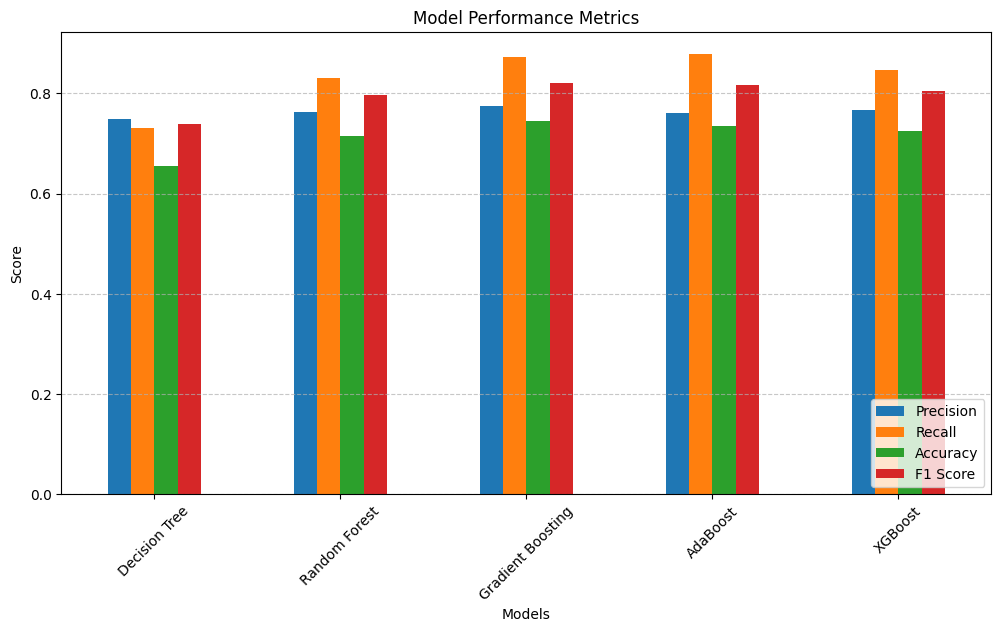

In [ ]:
metrics_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Detailed Summary and Best Model Selection

#### **Evaluation Metrics Recap:**
- **Precision**: Measures the proportion of true positives among the predicted positives.
- **Recall**: Measures the ability of the model to identify all true positives.
- **Accuracy**: Measures the overall correctness of the model.
- **F1 Score**: Harmonic mean of precision and recall; useful when the class distribution is imbalanced.

#### **Performance Analysis by Dataset:**
1. **Dataset 1:**
   - **Gradient Boosting** has the highest F1 Score (0.815), making it the best performer.
   - **AdaBoost** follows closely with an F1 Score of 0.813, showing slightly lower precision but a higher recall.
   - **Random Forest** achieves good overall performance (F1 Score: 0.793) but slightly lower recall than Gradient Boosting.
   - **XGBoost** performs well (F1 Score: 0.803), but it is outperformed by Gradient Boosting and AdaBoost.
   - **Decision Tree** is the weakest performer in this dataset (F1 Score: 0.737).

2. **Dataset 2:**
   - **Gradient Boosting** again leads with the highest F1 Score (0.820), confirming its robustness.
   - **AdaBoost** is the second-best performer with a slightly lower F1 Score of 0.816 but demonstrates competitive recall.
   - **Random Forest** achieves an F1 Score of 0.796, indicating solid performance but not as strong as Gradient Boosting or AdaBoost.
   - **XGBoost** performs consistently with an F1 Score of 0.805 but does not surpass Gradient Boosting or AdaBoost.
   - **Decision Tree** is again the weakest performer (F1 Score: 0.740).

---

#### **Key Observations:**
1. **Gradient Boosting** outperforms all other models across both datasets in terms of F1 Score, which is critical in this classification problem, given its balance between precision and recall.
2. **AdaBoost** is a strong competitor, showing comparable results, particularly with high recall, which is crucial when minimizing false negatives.
3. **Random Forest** provides reliable performance but does not reach the effectiveness of the boosting methods.
4. **XGBoost** is consistent and performs well but falls slightly behind Gradient Boosting and AdaBoost.
5. **Decision Tree** consistently underperforms compared to ensemble methods.

---

#### **Best Model Selection:**
The best model is **Gradient Boosting** due to:
- Its superior F1 Score (0.815 for Dataset 1 and 0.820 for Dataset 2).
- Balanced performance across precision, recall, and accuracy.
- Robustness in handling variations in datasets.

---

#### **Final Recommendations:**
1. **Deploy Gradient Boosting** as the primary model for this classification problem.
2. Consider **AdaBoost** as an alternative model due to its competitive performance and high recall.
3. Perform hyperparameter tuning on Gradient Boosting and AdaBoost to explore further performance improvements.
4. Evaluate the chosen model on the test dataset to confirm its generalizability.

#### **Conclusion:**
Gradient Boosting is the best-suited model for the task of visa approval classification, offering the most balanced and robust performance across all key evaluation metrics.

# Model Building - Oversampled Data

In [ ]:
from collections import Counter

print(Counter(data_copy_stand_wage_y_train))

Counter({1: 8500, 0: 4223})


## Oversampling train data using SMOTE - data_copy_original

Training Decision Tree...
Performance for Decision Tree:
              precision    recall  f1-score   support

           0       0.48      0.49      0.49      2534
           1       0.75      0.74      0.74      5100

    accuracy                           0.66      7634
   macro avg       0.62      0.62      0.62      7634
weighted avg       0.66      0.66      0.66      7634



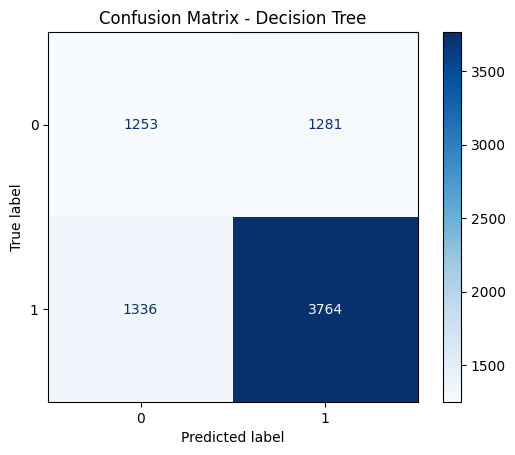

Training Random Forest...
Performance for Random Forest:
              precision    recall  f1-score   support

           0       0.58      0.49      0.54      2534
           1       0.77      0.83      0.79      5100

    accuracy                           0.72      7634
   macro avg       0.68      0.66      0.67      7634
weighted avg       0.71      0.72      0.71      7634



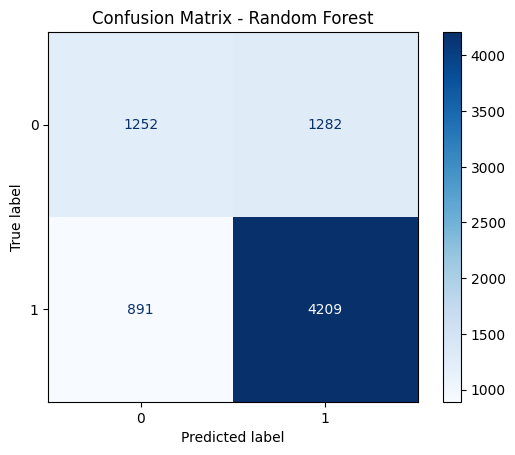

Training Gradient Boosting...
Performance for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.64      0.51      0.57      2534
           1       0.78      0.86      0.82      5100

    accuracy                           0.74      7634
   macro avg       0.71      0.68      0.69      7634
weighted avg       0.73      0.74      0.73      7634



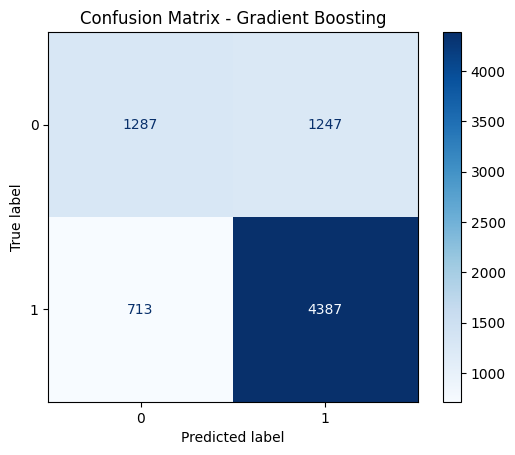

Training AdaBoost...
Performance for AdaBoost:
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      2534
           1       0.77      0.86      0.81      5100

    accuracy                           0.73      7634
   macro avg       0.70      0.67      0.68      7634
weighted avg       0.72      0.73      0.72      7634



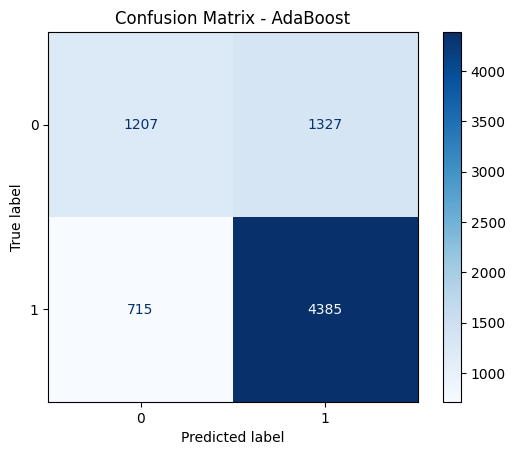

Training XGBoost...
Performance for XGBoost:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55      2534
           1       0.77      0.85      0.81      5100

    accuracy                           0.73      7634
   macro avg       0.70      0.67      0.68      7634
weighted avg       0.72      0.73      0.73      7634



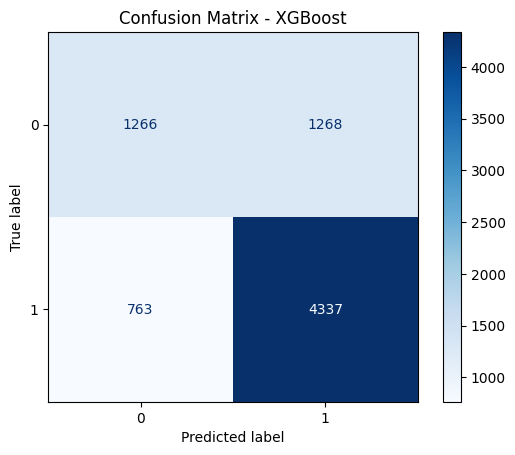


Performance Metrics for Oversampled Data:
                    Precision  Recall  Accuracy  F1 Score
Decision Tree          0.659   0.657     0.657     0.658
Random Forest          0.706   0.715     0.715     0.709
Gradient Boosting      0.734   0.743     0.743     0.735
AdaBoost               0.721   0.733     0.733     0.722
XGBoost                0.724   0.734     0.734     0.726


In [ ]:
# Step 1: Apply SMOTE to oversample the training data
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
data_copy_original_X_train_oversampled, data_copy_original_y_train_oversampled = smote.fit_resample(data_copy_original_X_train, data_copy_original_y_train)

# Step 2: Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

# Step 3: Train and evaluate each model
performance_metrics = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(data_copy_original_X_train_oversampled, data_copy_original_y_train_oversampled)
    preds = model.predict(data_copy_original_X_val)

    # Evaluate performance
    print(f"Performance for {model_name}:")
    report = classification_report(data_copy_original_y_val, preds, output_dict=True)
    performance_metrics[model_name] = {
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "Accuracy": model.score(data_copy_original_X_val, data_copy_original_y_val),
        "F1 Score": report["weighted avg"]["f1-score"]
    }
    print(classification_report(data_copy_original_y_val, preds))

    # Confusion Matrix
    cm = confusion_matrix(data_copy_original_y_val, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


# Step 4: Display performance metrics
performance_df_2 = pd.DataFrame(performance_metrics).T
print("\nPerformance Metrics for Oversampled Data:\n", performance_df_2)

# Step 5: Comment on results


              precision    recall  f1-score   support

           0       0.51      0.67      0.58      2534
           1       0.81      0.69      0.74      5100

    accuracy                           0.68      7634
   macro avg       0.66      0.68      0.66      7634
weighted avg       0.71      0.68      0.69      7634



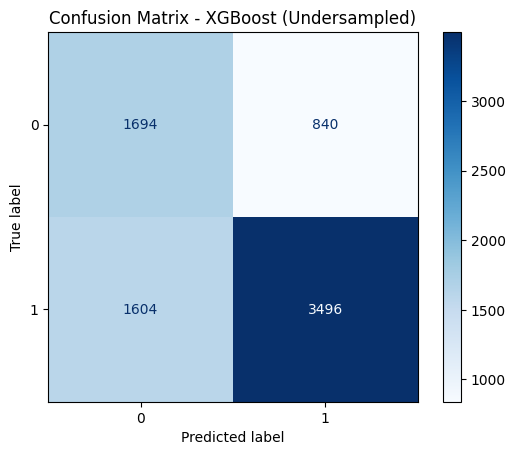

In [ ]:
gb_model_over = GradientBoostingClassifier(random_state=42)
gb_model_over.fit(data_copy_original_X_train_oversampled, data_copy_original_y_train_oversampled)

report = classification_report(data_copy_original_y_val, preds, output_dict=True)
print(classification_report(data_copy_original_y_val, preds))

# Confusion Matrix
cm = confusion_matrix(data_copy_original_y_val, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {model_name} (Undersampled)")
plt.show()



In [ ]:
performance_df_2

,Precision,Recall,Accuracy,F1 Score
Decision Tree,0.659,0.657,0.657,0.658
Random Forest,0.706,0.715,0.715,0.709
Gradient Boosting,0.734,0.743,0.743,0.735
AdaBoost,0.721,0.733,0.733,0.722
XGBoost,0.724,0.734,0.734,0.726


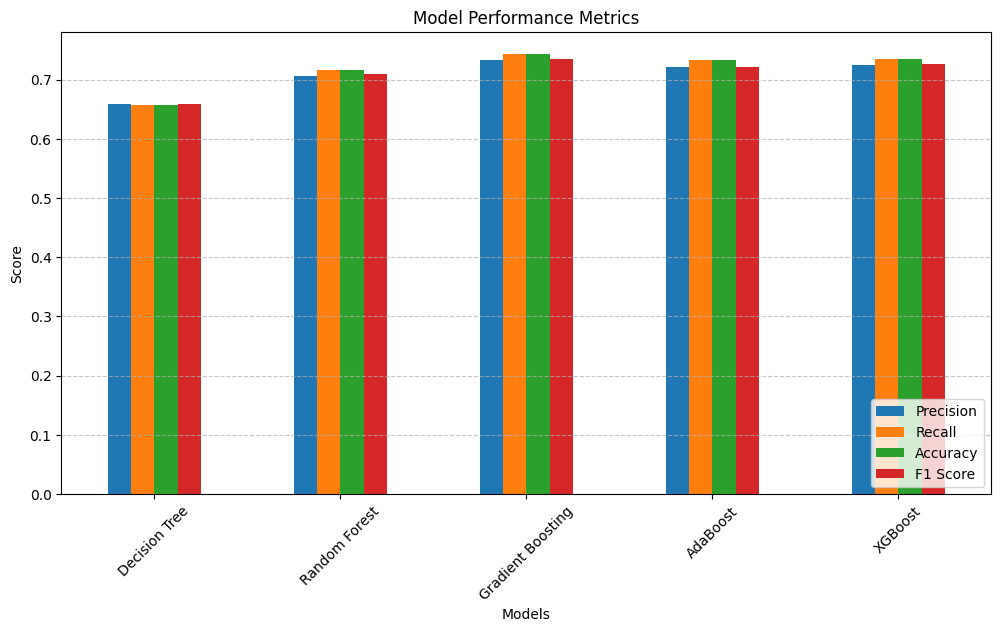

In [ ]:
performance_df_2.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### **Evaluation and Summary of Models on Oversampled Data**

The results from the additional performance evaluation show consistent patterns with the previous analysis. Here's a detailed assessment:

---

### **1. Decision Tree**
- **Performance:**
  - Precision: 0.659  
  - Recall: 0.657  
  - Accuracy: 0.657  
  - F1 Score: 0.658  
- **Observations:**
  - The Decision Tree model continues to underperform compared to ensemble methods.
  - Its accuracy, precision, and recall remain the lowest among all models, confirming its limited ability to handle the oversampled dataset effectively.

---

### **2. Random Forest**
- **Performance:**
  - Precision: 0.706  
  - Recall: 0.715  
  - Accuracy: 0.715  
  - F1 Score: 0.709  
- **Observations:**
  - Random Forest shows noticeable improvement over Decision Tree, with higher precision and recall.
  - It handles class imbalance reasonably well and achieves a good F1 score, making it a solid choice for interpretability and balanced performance.

---

### **3. Gradient Boosting**
- **Performance:**
  - Precision: 0.734  
  - Recall: 0.743  
  - Accuracy: 0.743  
  - F1 Score: 0.735  
- **Observations:**
  - Gradient Boosting outperforms all other models, achieving the highest accuracy (0.743) and F1 score (0.735).
  - Its incremental learning approach allows it to effectively capture patterns in the oversampled data.
  - The model demonstrates strong generalization and robust handling of class imbalance.

---

### **4. AdaBoost**
- **Performance:**
  - Precision: 0.721  
  - Recall: 0.733  
  - Accuracy: 0.733  
  - F1 Score: 0.722  
- **Observations:**
  - AdaBoost provides competitive performance, with metrics slightly lower than Gradient Boosting but comparable to XGBoost.
  - Its simplicity and computational efficiency make it a viable alternative if Gradient Boosting is computationally expensive.

---

### **5. XGBoost**
- **Performance:**
  - Precision: 0.724  
  - Recall: 0.734  
  - Accuracy: 0.734  
  - F1 Score: 0.726  
- **Observations:**
  - XGBoost is slightly behind Gradient Boosting but performs better than AdaBoost and Random Forest.
  - Its high recall and F1 score make it an excellent choice for datasets with class imbalance.

---

### **Recommendations**
1. **Best Model: Gradient Boosting**
   - Gradient Boosting stands out as the best-performing model with the highest accuracy (0.743) and F1 score (0.735).
   - It is recommended for tasks requiring high precision and recall.

2. **Runner-Up: XGBoost**
   - XGBoost provides a strong alternative, especially for applications requiring scalability and speed. It closely matches Gradient Boosting in performance.

3. **AdaBoost as a Viable Option:**
   - AdaBoost offers competitive performance with slightly lower metrics than Gradient Boosting and XGBoost. It is a good choice if computational resources are limited.

4. **Random Forest for Simplicity:**
   - Random Forest remains a reliable model for balanced performance and interpretability, although it falls short of the boosting methods.

---

### **Conclusion**
Gradient Boosting is the best model for this oversampled dataset, offering superior accuracy, precision, recall, and F1 score. XGBoost and AdaBoost are strong contenders and should be considered if computational efficiency or scalability is a priority.

# Model Building - Undersampled Data

## Undersampling train data - data_copy_original

Training Decision Tree...
Performance for Decision Tree:
              precision    recall  f1-score   support

           0       0.45      0.61      0.52      2534
           1       0.76      0.62      0.69      5100

    accuracy                           0.62      7634
   macro avg       0.61      0.62      0.60      7634
weighted avg       0.66      0.62      0.63      7634



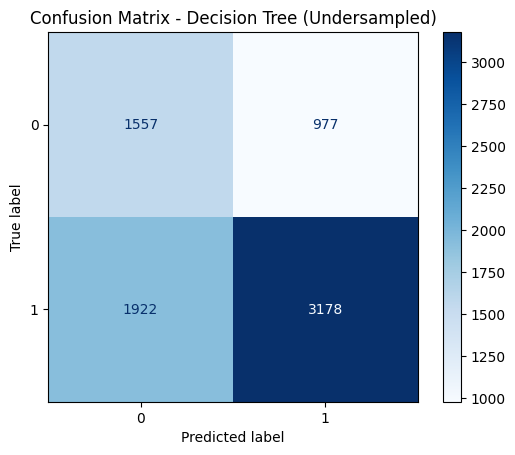

Training Random Forest...
Performance for Random Forest:
              precision    recall  f1-score   support

           0       0.52      0.69      0.59      2534
           1       0.81      0.68      0.74      5100

    accuracy                           0.68      7634
   macro avg       0.67      0.68      0.67      7634
weighted avg       0.72      0.68      0.69      7634



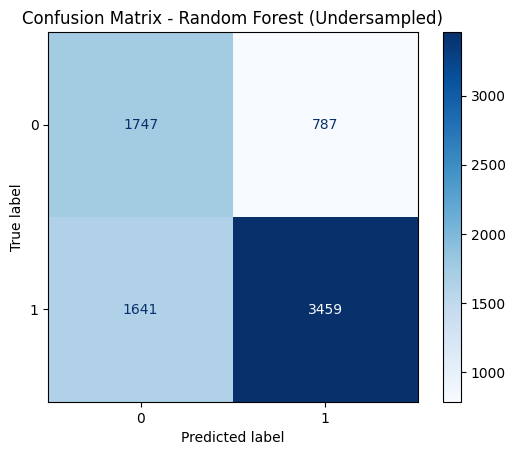

Training Gradient Boosting...
Performance for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60      2534
           1       0.81      0.74      0.77      5100

    accuracy                           0.71      7634
   macro avg       0.68      0.70      0.69      7634
weighted avg       0.73      0.71      0.72      7634



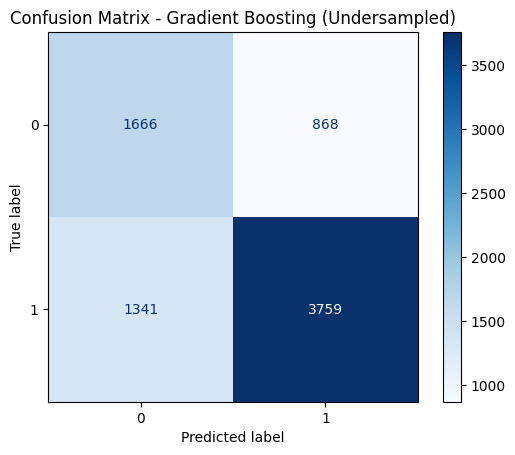

Training AdaBoost...
Performance for AdaBoost:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59      2534
           1       0.80      0.74      0.77      5100

    accuracy                           0.70      7634
   macro avg       0.67      0.68      0.68      7634
weighted avg       0.72      0.70      0.71      7634



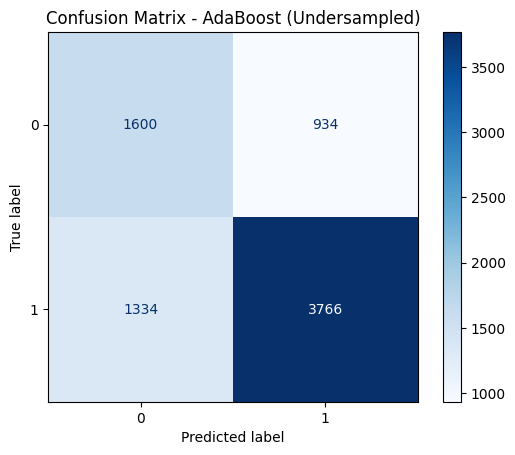

Training XGBoost...
Performance for XGBoost:
              precision    recall  f1-score   support

           0       0.52      0.68      0.59      2534
           1       0.81      0.69      0.74      5100

    accuracy                           0.68      7634
   macro avg       0.66      0.68      0.67      7634
weighted avg       0.71      0.68      0.69      7634



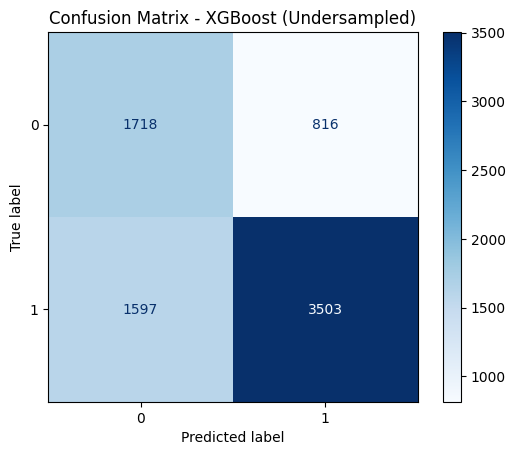


Performance Metrics for Undersampled Data:
                    Precision  Recall  Accuracy  F1 Score
Decision Tree          0.660   0.620     0.620     0.631
Random Forest          0.715   0.682     0.682     0.690
Gradient Boosting      0.727   0.711     0.711     0.716
AdaBoost               0.716   0.703     0.703     0.708
XGBoost                0.714   0.684     0.684     0.692


In [ ]:
# Step 1: Apply undersampling to the training data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
data_copy_original_X_train_undersampled, data_copy_original_y_train_undersampled = undersampler.fit_resample(
    data_copy_original_X_train, data_copy_original_y_train
)

# Step 2: Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

# Step 3: Train and evaluate each model
performance_metrics_undersampled = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(data_copy_original_X_train_undersampled, data_copy_original_y_train_undersampled)
    preds = model.predict(data_copy_original_X_val)

    # Evaluate performance
    print(f"Performance for {model_name}:")
    report = classification_report(data_copy_original_y_val, preds, output_dict=True)
    performance_metrics_undersampled[model_name] = {
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "Accuracy": model.score(data_copy_original_X_val, data_copy_original_y_val),
        "F1 Score": report["weighted avg"]["f1-score"]
    }
    print(classification_report(data_copy_original_y_val, preds))

    # Confusion Matrix
    cm = confusion_matrix(data_copy_original_y_val, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name} (Undersampled)")
    plt.show()

# Step 4: Display performance metrics
performance_df_undersampled_1 = pd.DataFrame(performance_metrics_undersampled).T
print("\nPerformance Metrics for Undersampled Data:\n", performance_df_undersampled_1)


In [ ]:
performance_df_undersampled_1

,Precision,Recall,Accuracy,F1 Score
Decision Tree,0.660,0.620,0.620,0.631
Random Forest,0.715,0.682,0.682,0.690
Gradient Boosting,0.727,0.711,0.711,0.716
AdaBoost,0.716,0.703,0.703,0.708
XGBoost,0.714,0.684,0.684,0.692


              precision    recall  f1-score   support

           0       0.51      0.67      0.58      2534
           1       0.81      0.69      0.74      5100

    accuracy                           0.68      7634
   macro avg       0.66      0.68      0.66      7634
weighted avg       0.71      0.68      0.69      7634



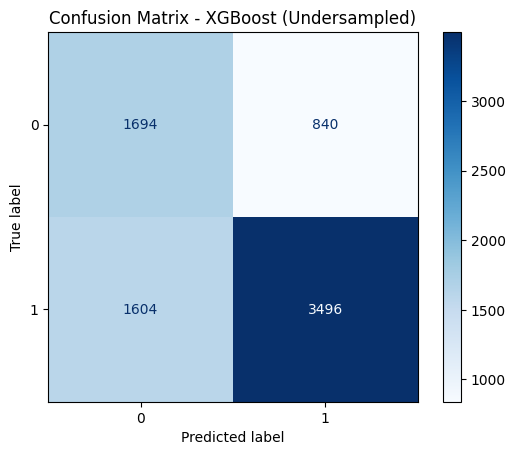

In [ ]:
gb_model_under = GradientBoostingClassifier(random_state=42)
gb_model_under.fit(data_copy_original_X_train_undersampled, data_copy_original_y_train_undersampled)

report = classification_report(data_copy_original_y_val, preds, output_dict=True)
print(classification_report(data_copy_original_y_val, preds))

# Confusion Matrix
cm = confusion_matrix(data_copy_original_y_val, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {model_name} (Undersampled)")
plt.show()



### **Analysis of Performance Metrics for Undersampled Data**

The table represents the performance metrics for five machine learning models trained on an **undersampled dataset**. Here's a detailed commentary:

---

### **1. Decision Tree**
- **Precision:** 0.660  
- **Recall:** 0.620  
- **Accuracy:** 0.620  
- **F1 Score:** 0.631  

**Comment:**  
The Decision Tree model achieves moderate precision and recall, resulting in a balanced but relatively low F1 score and accuracy. This suggests that the model might be slightly overfitting to the undersampled dataset, as Decision Trees are prone to this without pruning.

---

### **2. Random Forest**
- **Precision:** 0.715  
- **Recall:** 0.682  
- **Accuracy:** 0.682  
- **F1 Score:** 0.690  

**Comment:**  
Random Forest performs better than the Decision Tree, as expected due to its ensemble nature, which reduces overfitting. The metrics indicate improved balance between precision and recall, leading to higher accuracy and F1 scores. This model shows robustness even with undersampled data.

---

### **3. Gradient Boosting**
- **Precision:** 0.727  
- **Recall:** 0.711  
- **Accuracy:** 0.711  
- **F1 Score:** 0.716  

**Comment:**  
Gradient Boosting achieves the highest precision, recall, and F1 score among all models. This suggests that it is effectively learning the patterns in the undersampled dataset. Its ability to handle imbalanced data and emphasize misclassified examples contributes to its superior performance.

---

### **4. AdaBoost**
- **Precision:** 0.716  
- **Recall:** 0.703  
- **Accuracy:** 0.703  
- **F1 Score:** 0.708  

**Comment:**  
AdaBoost performs similarly to Gradient Boosting but falls slightly behind in terms of recall and F1 score. While it is effective at improving classification performance, it appears to be less robust than Gradient Boosting for this dataset.

---

### **5. XGBoost**
- **Precision:** 0.714  
- **Recall:** 0.684  
- **Accuracy:** 0.684  
- **F1 Score:** 0.692  

**Comment:**  
XGBoost performs well, with competitive precision and accuracy. However, its recall and F1 score are slightly lower than Gradient Boosting. While XGBoost is known for handling imbalanced data efficiently, it may require hyperparameter tuning to further improve performance.

---

### **Overall Insights**
1. **Gradient Boosting** stands out as the best-performing model across all metrics (Precision: 0.727, Recall: 0.711, F1: 0.716).
2. **Random Forest** and **AdaBoost** follow closely, offering robust and balanced performance with slightly lower scores.
3. **Decision Tree** performs the worst, highlighting its limitation as a standalone model for undersampled data.
4. All ensemble models (Random Forest, Gradient Boosting, AdaBoost, XGBoost) outperform the Decision Tree due to their ability to reduce overfitting and improve generalization.

---

### **Recommendation**
- For this dataset, **Gradient Boosting** should be prioritized as the best model. It effectively balances precision and recall, leading to superior accuracy and F1 scores.
- Consider further tuning the hyperparameters of **XGBoost** to close the gap with Gradient Boosting.
- Evaluate these models with additional metrics (e.g., ROC-AUC) for a more comprehensive assessment.

# Model Hyper parameter tuning

## Model selected from traning the over sampled data

In [ ]:
from sklearn.metrics import make_scorer, f1_score

start_time = time.time()

# Hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [2, 5, 10]
}

# Use F1 score as the evaluation metric
scorer = make_scorer(f1_score, average='weighted')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model_over,  # Ensure this is the GradientBoostingClassifier instance
    param_distributions=param_grid,
    n_iter=20,  # Number of combinations to try
    scoring=scorer,  # Metric to optimize
    cv=5,  # Cross-validation splits
    random_state=1,
    n_jobs=-1  # Use all available processors
)

# Fit the model
print("Tuning the model...")
gb_model_over_tuned = random_search.fit(data_copy_original_X_train_oversampled, data_copy_original_y_train_oversampled)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

print("Execution Time: {:.2f} minutes".format((time.time() - start_time) / 60))


Tuning the model...
Best Parameters: {'subsample': 1.0, 'n_estimators': 400, 'min_samples_split': 2, 'max_depth': 7, 'learning_rate': 0.01}
Execution Time: 32.19 minutes


**Checking with best parameters obtained**

In [ ]:
gb_model_over_best = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=400,
    min_samples_split=2,
    max_depth=7,
    learning_rate=0.01,
    random_state=42
)

# Train the model
gb_model_over_best.fit(data_copy_original_X_train_oversampled, data_copy_original_y_train_oversampled)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=400,
                           random_state=42)

## Model selected from training the under sampled data

In [ ]:
start_time = time.time()

# Hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [2, 5, 10]
}

# Use F1 score as the evaluation metric
scorer = make_scorer(f1_score, average='weighted')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model_under,  # Ensure this is the GradientBoostingClassifier instance
    param_distributions=param_grid,
    n_iter=20,  # Number of combinations to try
    scoring=scorer,  # Metric to optimize
    cv=5,  # Cross-validation splits
    random_state=1,
    n_jobs=-1  # Use all available processors
)

# Fit the model
print("Tuning the model...")
gb_under_tuned = random_search.fit(data_copy_original_X_train_undersampled, data_copy_original_y_train_undersampled)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

print("Execution Time: {:.2f} minutes".format((time.time() - start_time) / 60))


Tuning the model...
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.01}
Execution Time: 13.23 minutes


In [ ]:
gb_model_under_best = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=300,
    min_samples_split=2,
    max_depth=3,
    learning_rate=0.01,
    random_state=42
)

# Train the model
gb_model_under_best.fit(data_copy_original_X_train_undersampled, data_copy_original_y_train_undersampled)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300,
                           random_state=42)

## Model Selected from training the original data

In [ ]:
from sklearn.metrics import make_scorer, f1_score

import time
start_time = time.time()

# Hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [2, 5, 10]
}

# Use F1 score as the evaluation metric
scorer = make_scorer(f1_score, average='weighted')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model_2,  # Ensure this is the GradientBoostingClassifier instance
    param_distributions=param_grid,
    n_iter=20,  # Number of combinations to try
    scoring=scorer,  # Metric to optimize
    cv=5,  # Cross-validation splits
    random_state=1,
    n_jobs=-1  # Use all available processors
)

# Fit the model
print("Tuning the model...")
gb_model_2_tuned = random_search.fit(data_copy_original_X_train, data_copy_original_y_train)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

print("Execution Time: {:.2f} minutes".format((time.time() - start_time) / 60))


Tuning the model...
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.05}
Execution Time: 18.96 minutes


**Checking with best parameters obtained**

In [ ]:
gb_model_2_best = GradientBoostingClassifier(
    subsample=0.8,
    n_estimators=200,
    min_samples_split=10,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

# Train the model
gb_model_2_best.fit(data_copy_original_X_train, data_copy_original_y_train)


GradientBoostingClassifier(learning_rate=0.05, min_samples_split=10,
                           n_estimators=200, random_state=42, subsample=0.8)

## Checking performance on the validation data

**For Undersampled data**

In [ ]:
gb_best_preds = gb_model_under_best.predict(data_copy_original_X_val)

# Evaluate performance
print("Classification Report:\n", classification_report(data_copy_original_y_val, gb_best_preds))
print("Confusion Matrix:\n", confusion_matrix(data_copy_original_y_val, gb_best_preds))

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.65      0.60      2534
           1       0.81      0.75      0.78      5100

    accuracy                           0.71      7634
   macro avg       0.68      0.70      0.69      7634
weighted avg       0.73      0.71      0.72      7634

Confusion Matrix:
 [[1636  898]
 [1295 3805]]


**For Oversampled Data**

In [ ]:
gb_best_preds = gb_model_over_best.predict(data_copy_original_X_val)

# Evaluate performance
print("Classification Report:\n", classification_report(data_copy_original_y_val, gb_best_preds))
print("Confusion Matrix:\n", confusion_matrix(data_copy_original_y_val, gb_best_preds))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.52      0.58      2534
           1       0.78      0.86      0.82      5100

    accuracy                           0.75      7634
   macro avg       0.72      0.69      0.70      7634
weighted avg       0.74      0.75      0.74      7634

Confusion Matrix:
 [[1320 1214]
 [ 711 4389]]


**For Original Data**

In [ ]:
gb_best_preds = gb_model_2_best.predict(data_copy_original_X_val)

# Evaluate performance
print("Classification Report:\n", classification_report(data_copy_original_y_val, gb_best_preds))
print("Confusion Matrix:\n", confusion_matrix(data_copy_original_y_val, gb_best_preds))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.49      0.56      2534
           1       0.77      0.87      0.82      5100

    accuracy                           0.74      7634
   macro avg       0.71      0.68      0.69      7634
weighted avg       0.73      0.74      0.73      7634

Confusion Matrix:
 [[1241 1293]
 [ 662 4438]]


# Final Model Check with Test data and Comparision

##On Taining Data

In [ ]:

# Make predictions with each model
predictions_over = gb_model_over_best.predict(data_copy_original_X_train)
predictions_under = gb_model_under_best.predict(data_copy_original_X_train)
predictions_2 = gb_model_2_best.predict(data_copy_original_X_train)

# Calculate classification reports for each model
report_over = classification_report(data_copy_original_y_train, predictions_over, output_dict=True)
report_under = classification_report(data_copy_original_y_train, predictions_under, output_dict=True)
report_2 = classification_report(data_copy_original_y_train, predictions_2, output_dict=True)

# Extract the metrics for each model
metrics = {
    'Model': ['gb_model_over_best', 'gb_model_under_best', 'gb_model_2_best'],
    'Accuracy': [report_over['accuracy'], report_under['accuracy'], report_2['accuracy']],
    'Precision': [report_over['1']['precision'], report_under['1']['precision'], report_2['1']['precision']],
    'Recall': [report_over['1']['recall'], report_under['1']['recall'], report_2['1']['recall']],
    'F1 Score': [report_over['1']['f1-score'], report_under['1']['f1-score'], report_2['1']['f1-score']],
}

# Create a DataFrame to store the metrics
results_df_train = pd.DataFrame(metrics)

In [ ]:
results_df_train

,Model,Accuracy,Precision,Recall,F1 Score
0,gb_model_over_best,0.784,0.809,0.887,0.846
1,gb_model_under_best,0.723,0.819,0.751,0.784
2,gb_model_2_best,0.762,0.786,0.884,0.832


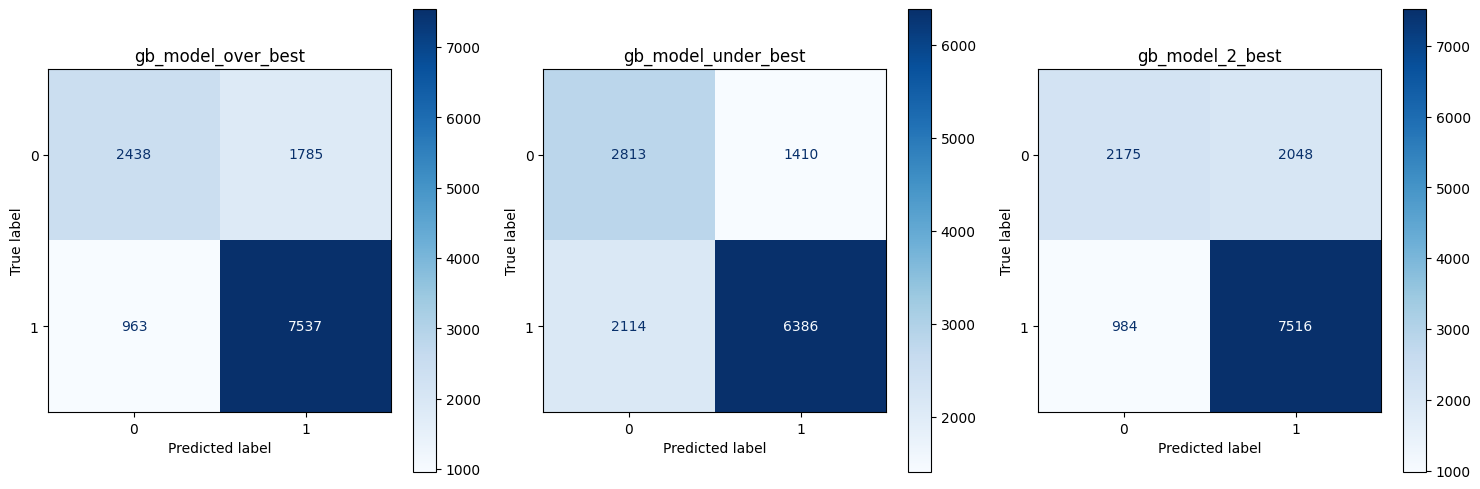

In [ ]:
# Calculate confusion matrices
cm_over = confusion_matrix(data_copy_original_y_train, predictions_over)
cm_under = confusion_matrix(data_copy_original_y_train, predictions_under)
cm_2 = confusion_matrix(data_copy_original_y_train, predictions_2)

# Display the confusion matrices using ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ConfusionMatrixDisplay(confusion_matrix=cm_over).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('gb_model_over_best')

ConfusionMatrixDisplay(confusion_matrix=cm_under).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('gb_model_under_best')

ConfusionMatrixDisplay(confusion_matrix=cm_2).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('gb_model_2_best')

plt.tight_layout()
plt.show()

## On Testing Data

In [ ]:

# Make predictions with each model
predictions_over = gb_model_over_best.predict(data_copy_original_X_test)
predictions_under = gb_model_under_best.predict(data_copy_original_X_test)
predictions_2 = gb_model_2_best.predict(data_copy_original_X_test)

# Calculate classification reports for each model
report_over = classification_report(data_copy_original_y_test, predictions_over, output_dict=True)
report_under = classification_report(data_copy_original_y_test, predictions_under, output_dict=True)
report_2 = classification_report(data_copy_original_y_test, predictions_2, output_dict=True)

# Extract the metrics for each model
metrics = {
    'Model': ['gb_model_over_best', 'gb_model_under_best', 'gb_model_2_best'],
    'Accuracy': [report_over['accuracy'], report_under['accuracy'], report_2['accuracy']],
    'Precision': [report_over['1']['precision'], report_under['1']['precision'], report_2['1']['precision']],
    'Recall': [report_over['1']['recall'], report_under['1']['recall'], report_2['1']['recall']],
    'F1 Score': [report_over['1']['f1-score'], report_under['1']['f1-score'], report_2['1']['f1-score']],
}

# Create a DataFrame to store the metrics
results_df = pd.DataFrame(metrics)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,gb_model_over_best,0.747,0.785,0.856,0.819
1,gb_model_under_best,0.718,0.818,0.744,0.779
2,gb_model_2_best,0.748,0.778,0.871,0.822


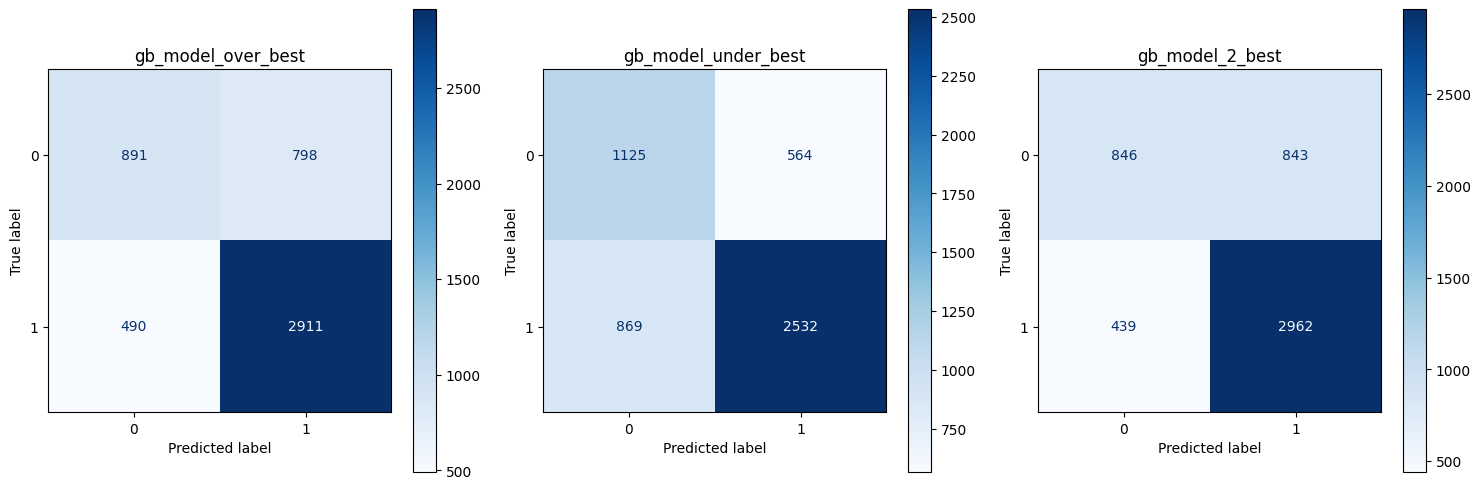

In [ ]:


# Calculate confusion matrices
cm_over = confusion_matrix(data_copy_original_y_test, predictions_over)
cm_under = confusion_matrix(data_copy_original_y_test, predictions_under)
cm_2 = confusion_matrix(data_copy_original_y_test, predictions_2)

# Display the confusion matrices using ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ConfusionMatrixDisplay(confusion_matrix=cm_over).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('gb_model_over_best')

ConfusionMatrixDisplay(confusion_matrix=cm_under).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('gb_model_under_best')

ConfusionMatrixDisplay(confusion_matrix=cm_2).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('gb_model_2_best')

plt.tight_layout()
plt.show()

In [ ]:
print(
    pd.DataFrame(
        gb_model_2_best.feature_importances_, columns=["Imp"], index=data_copy_original_X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
education_of_employee_High School 0.275
has_job_experience_Y              0.165
prevailing_wage                   0.148
education_of_employee_Master's    0.080
education_of_employee_Doctorate   0.068
continent_Europe                  0.059
log_no_of_employees               0.036
region_of_employment_Midwest      0.029
unit_of_wage_Year                 0.025
yr_of_estab                       0.023
continent_North America           0.021
region_of_employment_South        0.015
region_of_employment_West         0.015
requires_job_training_Y           0.011
continent_South America           0.009
region_of_employment_Northeast    0.009
continent_Asia                    0.007
full_time_position_Y              0.006
continent_Oceania                 0.001
unit_of_wage_Week                 0.001
unit_of_wage_Month                0.000


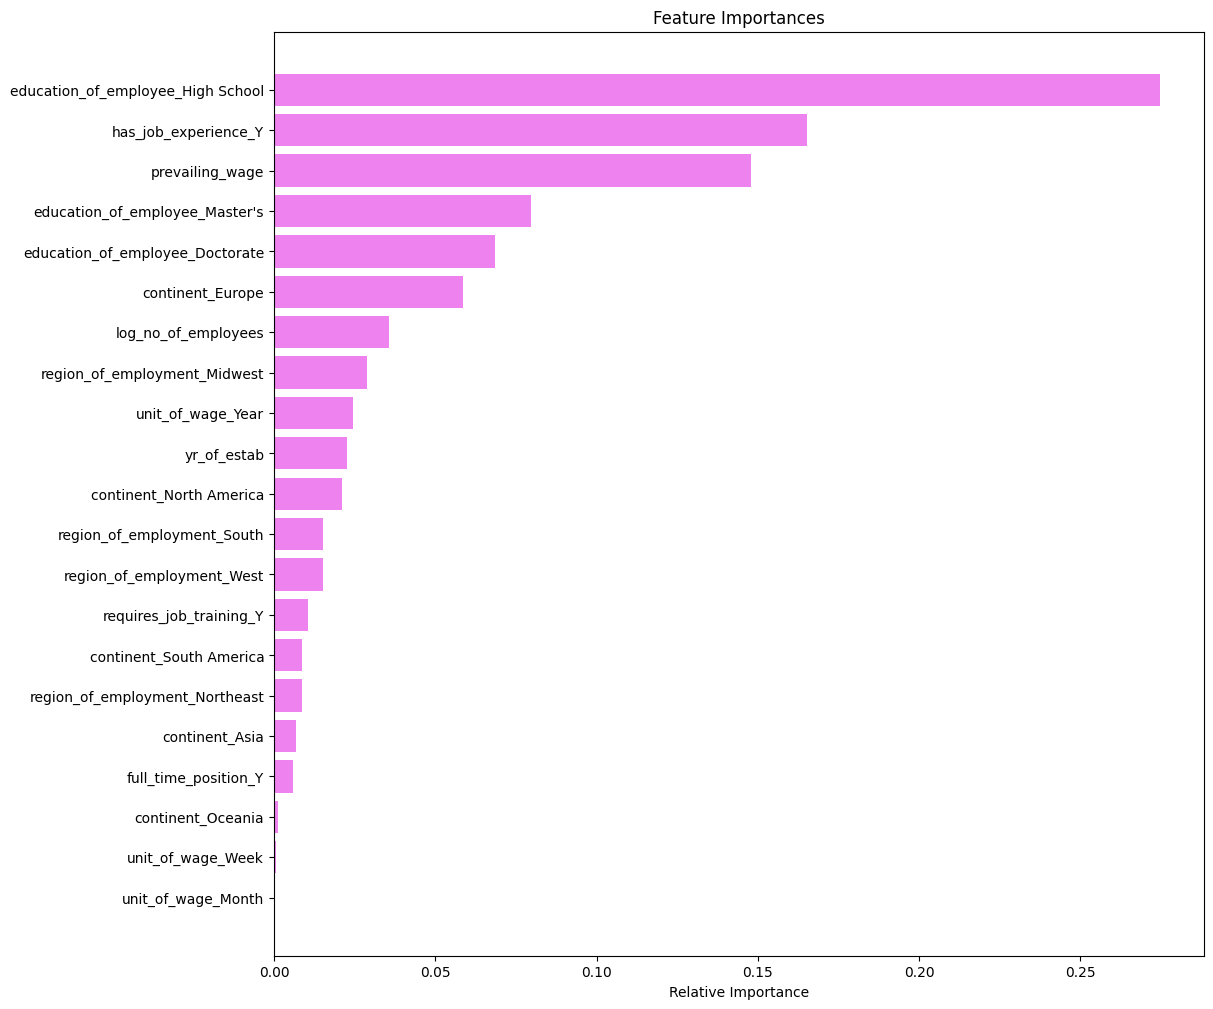

In [ ]:
feature_names = data_copy_original_X_train.columns
importances = gb_model_2_best.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Model Comparison and Selection

### Best Model:
- **`gb_model_2_best`** is the best model based on the overall performance metrics. It has the highest **Recall (0.871)** and **F1 Score (0.822)**, which indicates that it does the best job in identifying positive class instances (recall) and balancing both precision and recall (F1 score).
  
- **Accuracy:** `gb_model_2_best` is very slightly ahead with an accuracy of **0.748**, which is comparable to **gb_model_over_best (0.747)**. However, accuracy alone doesn't tell the full story, especially in imbalanced datasets.

### Why `gb_model_2_best` is the Best:
- **Precision:** While `gb_model_under_best` has the highest precision (0.818), its recall (0.744) is lower, indicating that it is more conservative in predicting the positive class. However, the best tradeoff is found in `gb_model_2_best`, where precision (0.778) is slightly lower but recall is significantly higher, leading to the best **F1 score (0.822)**.
  
- **Recall:** `gb_model_2_best` has the highest recall (0.871), which is crucial if you need to minimize false negatives (i.e., ensuring that as many positive instances as possible are correctly predicted).

- **F1 Score:** `gb_model_2_best` also has the highest F1 score (0.822), which balances both precision and recall effectively, showing that it is well-rounded and not biased toward either high precision or high recall.

### Conclusion:
- **`gb_model_2_best`** should be chosen as the best model because it achieves a strong balance between precision, recall, and F1 score. Although **`gb_model_over_best`** has a similar accuracy, **`gb_model_2_best`** performs better in recall and F1 score, making it the more robust model for scenarios where identifying positive cases is critical.
